# Capstone project : Recommendation System for social media Influencers (Instagram) in Saudi Arabia


##  Problem Statement

Recently, social media and influencers have become a powerful and fast tool for marketing in Saudi Arabia.  However, Sometimes, companies and advertisers may turn to inappropriate influencers for their advertising campaign or may not reach the target segment of the campaign which may adversely affect them in terms of money loss or campaign failure. Also, they may think about one famous influencer(with high followers number), and they ignore hidden accounts with a great number of followers and also, high engagement rate.


# Import models

In [1104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
 
import re
from nltk.stem import PorterStemmer
from collections import Counter
#from googletrans import Translator
#from google.cloud import translate
import unicodedata
from unidecode import unidecode
import copy
import six
import requests
import yandex.Translater  
import time
import string
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats
from rake_nltk import Rake
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

%matplotlib inline

## Datasets Description
To get data about all influencers in Saudi Arabia I used  an API of one of the analytics websites that have access in the world Instagram influencer which is https://ninjaoutreach.com/social-api/ (It needs a subscription) I used the request library and I did 181 requests using the API to get over 9000 accounts with search  methods and my search key was Saudi Arabia. The response was containing over 30 feature that describes one influencer at a time.
When exploring the dataset I found tow questions regarding the values.
First one: The API response contains a lot of accounts belongs to the governmental sector, companies, boutiques and the followers of the influencer start from 1000 and above. The answer was found in the article shows that less than 1000 followers in the account will be considered as a personal account and they just classify influencer based on their experiment and after a closer look at more than 36,000 influencers, checked in the website  Hype Auditor (link: https://medium.com/influencer-marketing-made-easy/how-do-micro-influencers-and-mega-influencers-compare-in-instagram-engagement-rates-cfab691ed600).
Second one: Why influencers with a low number of followers have a large number of engagement rate? The answer was found also in the article says that with a simple question have a complicated answer: how is Instagram engagement rate calculated?
To find your Instagram engagement rate, you’ll need to divide the engagement by either your followers or impressions so it will be low if the denominator was high in the followers' case. But in my dataset case, the API didn't have access to the impressions, the first option for calculating the Instagram engagement rate is to divide the total number of likes and comments by your follower count, and then multiply by 100 to give them a percentage.


# Data Import and Cleaning

In [180]:
#Read the dataSet
saudi_influencer=pd.read_csv('Saudi Arabia Influencers.csv')

In [181]:
#see the head of the data
saudi_influencer.head()

id     user_id     username        full_name first_name last_name  \
0  27584894  2125097673          d21       アブドゥラフマン🇸🇦        NaN       NaN   
1  28265546  3302933145   ionecare_0           sabar🌵        NaN       NaN   
2   6470102  5987275525         6caa  Rola Al Shehri.       Rola   Shehri.   
3   6282196  5548262534        0rs__       🅺🅷🅸🅻🅰🅽 ⑤⓪⑨        NaN       NaN   
4   6771713  5867282508  shoug.19991    شوق العتيبي🦄💛        NaN       NaN   

                                         biography                    website  \
0  KSA kingdom of Saudi Arabia\nJazan Saudi Arabia  https://d21x.sarahah.com/   
1                                     Saudi arabia                        NaN   
2                                  Saudi Arabia 🇸🇦                        NaN   
3                       🅐🅛🅝🅐🅢🅢🅡💙💛\nSaudi Arabia🇸🇦💚                        NaN   
4                                  Saudi Arabia🇸🇦.                        NaN   

   birth_year  cost_post  ...   posts posts_per_week last_post_analyzed  \
0         NaN     2200.0  ...  3092.0       1.576539        BumBBurjkWg   
1         NaN      120.0  ...  4972.0      11.557626        Bq129oMllw0   
2         NaN      860.0  ...    54.0       1.050800        BqM16yMltKB   
3         NaN      100.0  ...    20.0       1.030711        Bqhez-PHCJT   
4         NaN      130.0  ...    28.0       0.000000                NaN   

  posts_per_analysis categories deleted                     discovered_at  \
0           3.218126         []   False                               NaN   
1          11.617500         []   False                               NaN   
2           8.559660         []   False  2018-06-15T11:19:09.479491+00:00   
3           7.037500         []   False                               NaN   
4           0.000000        NaN   False                               NaN   

                         created_at                        updated_at  \
0                               NaN        2019-03-09T01:46:16.819524   
1                               NaN        2018-12-03T09:44:11.859081   
2  2018-06-24T17:56:02.985294+00:00  2018-11-15T19:54:47.418312+00:00   
3                               NaN        2018-11-27T11:10:00.682509   
4                               NaN        2018-12-09T01:58:15.433880   

                       emails  
0                          []  
1                          []  
2  ['rolalsh_10@hotmail.com']  
3                          []  
4                          []  

[5 rows x 52 columns]

In [182]:
#see the tail of the data
saudi_influencer.tail()

id     user_id                 username  \
9077    8596955  4543896741                    0_ma5   
9078  200487136  1409008585             majed0000008   
9079   30104231  1798997895            saudiblogging   
9080   31710639  1660364574         inspiredbyarabia   
9081  226819616  3114657050  finlandselectshop_vaasa   

                           full_name first_name last_name  \
9077      جوالات اصلية %💯 majed shop      Arabi    Mobile   
9078     جوالات اصلية  %💯 majed shop      Arabi    Mobile   
9079  Saudi Blogging 🇸🇦 By H a i f a  Lifestyle    Travel   
9080     🔸I N S P I R E D by ARABIA🔸        NaN       NaN   
9081           フィンランド セレクト ショップ ヴァーサ        NaN       NaN   

                                              biography  \
9077  Saudi Arabi\n#فرع_الدخل\n#فرع_قرطبة\n• 9:30 AM...   
9078  Saudi Arabi\n#فرع_الدخل\n#فرع_قرطبة\n• 9:30 AM...   
9079  Sharing what my eyes capture 💕\nLifestyle • Fa...   
9080  🔸Arabian Inspired Design, Home Decor & Accesso...   
9081  vaasäの次のイベントは\n2019.2/4〜11のSAPPORO雪まつりです\n大通り7...   

                                 website  birth_year  cost_post  ...   posts  \
9077    https://goo.gl/maps/iXvMCaeHzKD2         NaN      470.0  ...   209.0   
9078    https://goo.gl/maps/iXvMCaeHzKD2         NaN      470.0  ...   311.0   
9079                                 NaN         NaN      870.0  ...  1150.0   
9080  https://www.society6.com/blueabaya         NaN      140.0  ...   386.0   
9081                http://vaasa111.com/         NaN      120.0  ...  1126.0   

     posts_per_week last_post_analyzed posts_per_analysis  \
9077       1.171969        BsLJpeQBhnn           12.00000   
9078       1.595381        BsLJOWMhVck           12.00000   
9079       0.755279        BuvpD-bhQS6            3.56290   
9080       0.340050        BrRvbhnh1C8            8.01375   
9081      19.732410        Bs60hapntp5           12.00000   

                                             categories deleted  \
9077                                                 []   False   
9078                                                NaN   False   
9079  ['Blogging', 'Food', 'Lifestyle', 'Fashion', '...   False   
9080                                         ['Design']   False   
9081                                                NaN   False   

                   discovered_at                  created_at  \
9077                         NaN                         NaN   
9078  2019-01-05T06:51:08.205352  2019-01-05T06:51:08.205352   
9079                         NaN                         NaN   
9080                         NaN                         NaN   
9081  2019-01-22T09:58:11.421359  2019-01-22T09:58:11.421359   

                      updated_at                                 emails  
9077  2019-01-04T17:08:40.696767                                     []  
9078  2019-01-05T06:51:08.205352                                     []  
9079  2019-03-13T12:19:01.790298                                     []  
9080  2019-02-28T06:28:34.125515              ['contact@blueabaya.com']  
9081  2019-01-22T09:58:11.421359  ['finlandselectshop.vaasa@gmail.com']  

[5 rows x 52 columns]

In [183]:
# see the columns names
saudi_influencer.columns

Index(['id', 'user_id', 'username', 'full_name', 'first_name', 'last_name',
       'biography', 'website', 'birth_year', 'cost_post', 'cost_video',
       'location_country', 'location_region', 'location_city',
       'location_method', 'gender', 'language', 'followers', 'following',
       'followers_to_following', 'is_private', 'is_verified',
       'is_business_account', 'business_email', 'business_phone_number',
       'business_address', 'business_category', 'profile_pic_url',
       'profile_pic_url_hd', 'engagement_rate', 'engagement_rate_image',
       'engagement_rate_video', 'likes_per_post', 'likesb_per_post_pct',
       'likes_per_post_image', 'likes_per_post_video', 'replies_per_post',
       'replies_per_post_pct', 'replies_per_post_image',
       'replies_per_post_video', 'views_per_video', 'views_per_video_pct',
       'posts', 'posts_per_week', 'last_post_analyzed', 'posts_per_analysis',
       'categories', 'deleted', 'discovered_at', 'created_at', 'updated_at',
     

In [184]:
#exploring data with condations
saudi_influencer[saudi_influencer['followers']<5000][['username','engagement_rate','followers','posts','cost_post','likes_per_post','replies_per_post']].iloc[0:100] 

username  engagement_rate  followers   posts  cost_post  \
1          ionecare_0         0.002177       1684  4972.0      120.0   
3               0rs__         0.103047       1209    20.0      100.0   
4         shoug.19991         0.000000       2208    28.0      130.0   
7              maas_8         0.000000       1068    20.0      100.0   
8           peashacom         0.039854       2919    43.0      140.0   
9             amg2507         0.205279       1023     4.0      100.0   
12              f.z91         0.000000       3878    55.0      160.0   
13             m5po77         0.000000       3203     0.0      150.0   
14             llilny         0.000000       2825     0.0      140.0   
15             roemxz         0.000000       1022     0.0      100.0   
17   om_abdulrahman.7         0.000000       1229   837.0      110.0   
18              i4bdr         0.040250       4764   281.0      180.0   
19           m.zh.702         0.000000       2045   699.0      120.0   
20           n.r20n.r         0.000000       1050     6.0      100.0   
23       sari.albaker         0.038436       1780   249.0      120.0   
24            mlk_als         0.020676       2253   566.0      130.0   
25              x3hud         0.000000       1786     0.0      120.0   
26    macrophilia_fan         0.000000       1073   384.0      100.0   
27               ha2x         0.000000       1138    56.0      100.0   
28             brvits         0.021724       2541     5.0      130.0   
30          mralomair         0.000000       1025    48.0      100.0   
31       ahmadfalgi10         0.156645       2953     7.0      140.0   
32        channieavis         0.048032       1211    86.0      100.0   
33         khalid_i_7         0.000000       1862    65.0      120.0   
34       abdullah_scu         0.138265       2048    49.0      120.0   
35              n8.4_         0.000000       3526   130.0      160.0   
36           k_hilali         0.034214       4618    37.0      180.0   
37              ilav8         0.004536       3270    13.0      150.0   
38          ali_y_m80         0.000000       1442   147.0      110.0   
40               zxub         0.000000       1444     2.0      110.0   
..                ...              ...        ...     ...        ...   
91               qlk0         0.000000       3021     1.0      150.0   
92       rawan_shrari         0.026621       1033    68.0      100.0   
94              gnlgn         0.027654       1350   350.0      110.0   
95             gagoo5         0.258846       3900    65.0      170.0   
102           fsl_107         0.107325       2282    39.0      130.0   
103              pqa_         0.041938       2642     5.0      140.0   
105              r84p         0.261032       4188     5.0      170.0   
106         que.nonie         0.015983       1366   229.0      110.0   
107         shaha2020         0.016580       1342   972.0      110.0   
108     alisuhaibani3         0.000000       3085    92.0      150.0   
109         amar_1415         0.000000       2620    24.0      140.0   
110           ashyarn         0.018843       3025   368.0      150.0   
111            vxrrvx         0.123671       1035     1.0      100.0   
112             r_248         0.290927       1014    96.0      100.0   
113             1.7md         0.000000       1229    98.0      110.0   
114           ruba_we         0.026151       3330    73.0      150.0   
115         relax_22_         0.000000       2254    11.0      130.0   
116              i0ik         0.042823       1477    87.0      110.0   
117    nouraaldkheel3         0.000000       1421    59.0      110.0   
118           roude.a         0.193411       2499   112.0      130.0   
119      noof_salem12         0.009574       1001   588.0      100.0   
120             l17rn         0.008860       4703    31.0      180.0   
121             cic.9         0.000000       1666     9.0      110.0   
122            tmsa5_         0.040259       1184   1

In [185]:
# exploring data with condation 
sort_by_followers= saudi_influencer.sort_values('followers',ascending=True)

In [186]:
saudi_influencer[['engagement_rate','posts_per_analysis']]

engagement_rate  posts_per_analysis
0            0.008478            3.218126
1            0.002177           11.617500
2            0.055534            8.559660
3            0.103047            7.037500
4            0.000000            0.000000
5            0.038221            9.802500
6            0.018442           12.000000
7            0.000000            0.000000
8            0.039854           12.000000
9            0.205279            3.550000
10           0.003070            1.000026
11           0.007844            1.000000
12           0.000000            0.000000
13           0.000000            0.000000
14           0.000000            0.000000
15           0.000000            0.000000
16           0.115006           12.000000
17           0.000000            0.000000
18           0.040250           12.000000
19           0.000000            0.000000
20           0.000000            0.000000
21           0.000000            0.000000
22           0.000000            0.000000
23           0.038436           12.000000
24           0.020676           12.000000
25           0.000000            0.000000
26           0.000000            0.000000
27           0.000000            0.000000
28           0.021724            5.000000
29           0.000000            0.000000
...               ...                 ...
9052         0.066437           12.000000
9053         0.000000           12.000000
9054         0.007446            5.067536
9055         0.039965           12.000000
9056         0.000000            0.000000
9057         0.000273            2.676971
9058         0.017955            1.082926
9059         0.020843           10.350000
9060         0.003248           12.000000
9061         0.009411           10.291500
9062         0.000000            0.000000
9063         0.022323           12.000000
9064         0.003730            8.627052
9065         0.000544           12.000000
9066         0.030123           12.000000
9067         0.209251           12.000000
9068         0.073227           12.000000
9069         0.061834           12.000000
9070         0.091596           12.000000
9071         0.004368           12.000000
9072         0.029901           12.000000
9073         0.003568            3.624672
9074         0.010388           12.000000
9075         0.000000            0.000000
9076         0.001684           12.000000
9077         0.001551           12.000000
9078         0.005301           12.000000
9079         0.007559            3.562900
9080         0.047025            8.013750
9081         0.054763           12.000000

[9082 rows x 2 columns]

In [187]:
# exploring data with condation
sort_by_engagement_rate= saudi_influencer.sort_values('engagement_rate',ascending=False)

In [188]:
sort_by_engagement_rate[['username','engagement_rate','followers','posts','cost_post','likes_per_post']] 

username  engagement_rate  followers   posts  cost_post  \
7067              naif_asia         1.094284       2047    12.0      120.0   
4551                   1bn8         0.764923       1357     1.0      110.0   
3696                   uo0k         0.753225      35040     1.0     1320.0   
4364                   uo0k         0.753225      35040     1.0     1320.0   
89                     2i2d         0.671289      15001     1.0      560.0   
3005          asmaa_alwaqit         0.642726       1361   210.0      110.0   
1954                 _ab.38         0.630940      21506     1.0      810.0   
1190                  xyl.2         0.591805       2656    24.0      140.0   
3053     chocoworldofficial         0.591213       4040   367.0      170.0   
2983                 omsloh         0.582468       1445   285.0      110.0   
6575                  nj_53         0.578719       1192    74.0      100.0   
1293                 i.iifa         0.575442       1774    31.0      120.0   
5316               eyleanor         0.559435       2936    12.0      140.0   
4656               eyleanor         0.559435       2936    12.0      140.0   
2923                  ad.gb         0.547519       4984    18.0      190.0   
5049              _seham109         0.533688       1081   357.0      100.0   
3205              amm_ar187         0.526332       6532     1.0      240.0   
7738                 rrixzz         0.519811       1182    66.0      100.0   
7758                 rrixzz         0.519811       1182    66.0      100.0   
5279                   2icv         0.515594       3837     3.0      160.0   
4613                   2icv         0.515594       3837     3.0      160.0   
656            devil_skull0         0.510144       1053    11.0      100.0   
6181                  pa.a7         0.504711       2144    10.0      130.0   
410                   fnq16         0.498767       5675    35.0      210.0   
1181               lilseelw         0.495129       2053    54.0      120.0   
1205               lilseelw         0.495129       2053    54.0      120.0   
6574        ja7wad__badkook         0.488142       1012    10.0      100.0   
77               hanadi.017         0.478120       1752   212.0      120.0   
6224          hassanmjameel         0.465897      32812     1.0     1230.0   
1541                zoina17         0.458077       1137    83.0      100.0   
...                     ...              ...        ...     ...        ...   
3672              samaamiri         0.000000      19750   385.0      740.0   
7109                azo_404         0.000000       1229     1.0      110.0   
7110                 _ziiz9         0.000000       1062   106.0      100.0   
3671         sara_albediywi         0.000000      19057   660.0      720.0   
3523                  vgn21         0.000000      11318    14.0      430.0   
7184               mnaloush         0.000000     119396   607.0     3910.0   
3529               saudi_39         0.000000       1234   261.0      110.0   
3541       ameeramohammad02         0.000000       1963   250.0      120.0   
7175         yazeed_kingdom         0.000000      15173   264.0      570.0   
7174             sara1989_1         0.000000       1714   852.0      120.0   
3554          abdulla_aryan         0.000000       1396   104.0      110.0   
3555                 i3miir         0.000000       2184    82.0      130.0   
3560               saeed_3n         0.000000       1250   417.0      110.0   
3579                ampsdor         0.000000       2238  1048.0      130.0   
3587  jawad_ali_al_ramadhan         0.000000       1542   491.0      110.0   
3593                naifah9         0.000000       5368   146.0      200.0   
3603  jawad_ali_al_ramadhan         0.000000       1542   491.0      110.0   
3612                 _xs0na         0.000000       4979   187.0      190.0   
3614              n00ny1199         0.000000       1599   417.0      110.0   
7137        adrianna_arabia         0.000

In [189]:
#get more info tegarding values
saudi_influencer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 52 columns):
id                        9082 non-null int64
user_id                   9082 non-null int64
username                  9082 non-null object
full_name                 8744 non-null object
first_name                4651 non-null object
last_name                 4651 non-null object
biography                 9015 non-null object
website                   3872 non-null object
birth_year                7 non-null float64
cost_post                 9082 non-null float64
cost_video                9082 non-null float64
location_country          4688 non-null object
location_region           3822 non-null object
location_city             3776 non-null object
location_method           4493 non-null object
gender                    1524 non-null object
language                  7860 non-null object
followers                 9082 non-null int64
following                 9082 non-null int64
foll

### EDA & Visualization


In [190]:
# the followers number  containesalot outliares and it need to be divided 
saudi_influencer_plot_less_m = saudi_influencer[saudi_influencer.followers<1000000]
saudi_influencer_plot_more_m = saudi_influencer[saudi_influencer.followers>1000000]

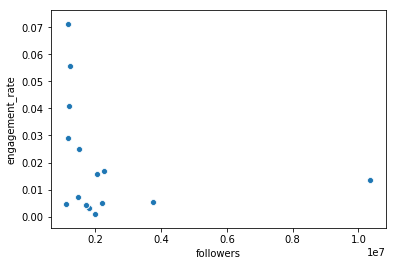

In [191]:
# scatter plot for followers', y='engagement_rate' more than 1000000
sns.scatterplot(x='followers', y='engagement_rate', data=saudi_influencer_plot_more_m)

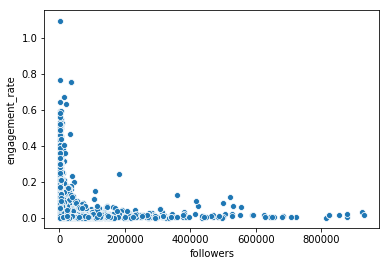

In [192]:
#scatter plot for followers', y='engagement_rate' less than 1000000
sns.scatterplot(x='followers', y='engagement_rate', data=saudi_influencer_plot_less_m)

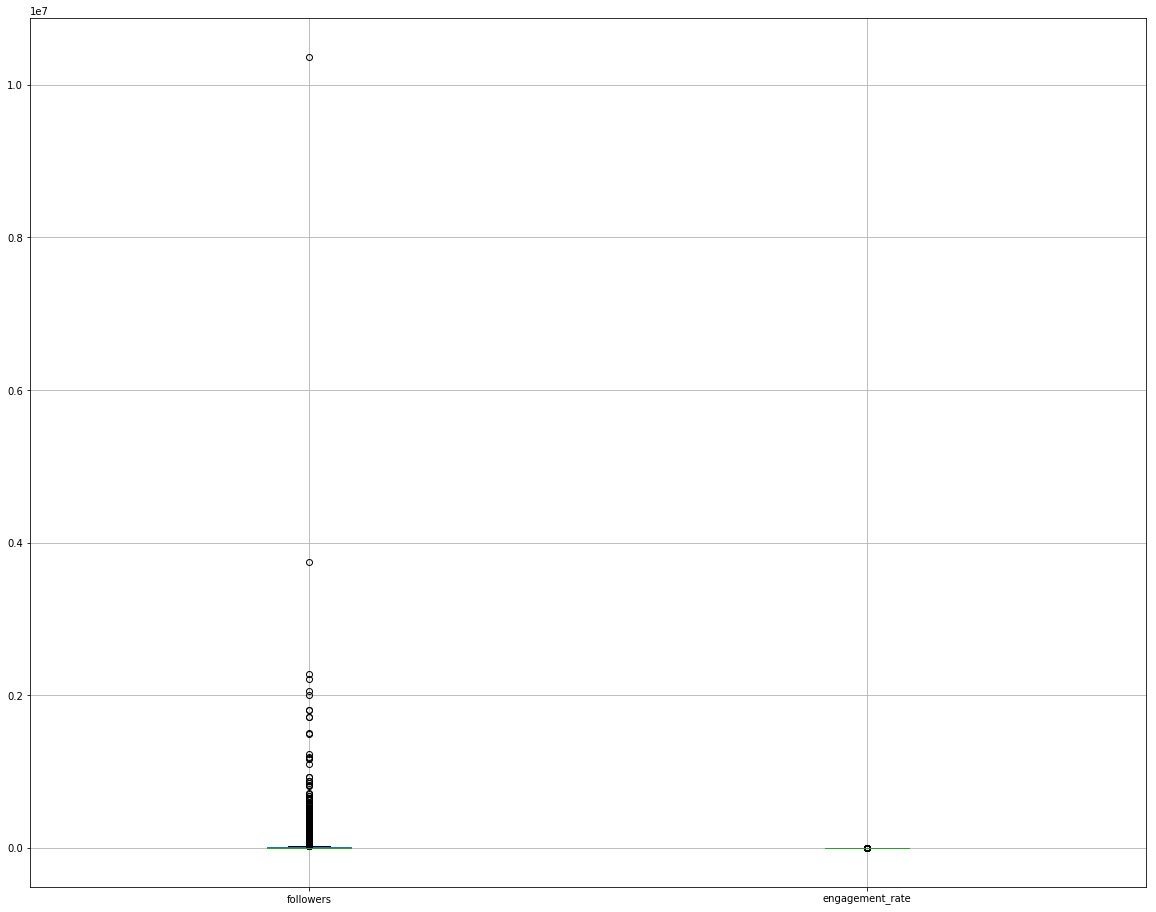

In [193]:
#boxplot to show the ouliares
ax1=saudi_influencer[['followers','engagement_rate']].boxplot(figsize=(20,16))

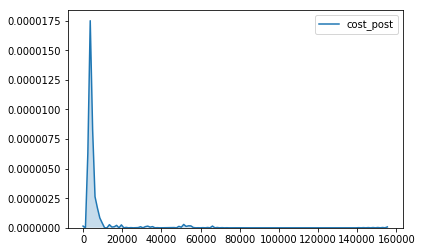

In [194]:
# visualize the distrbuation of cost_post
sns.kdeplot(saudi_influencer['cost_post'], shade=True);

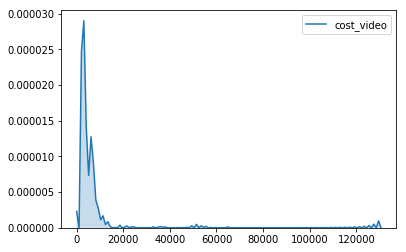

In [195]:
# visualize the distrbuation of cost_video

sns.kdeplot(saudi_influencer['cost_video'], shade=True);

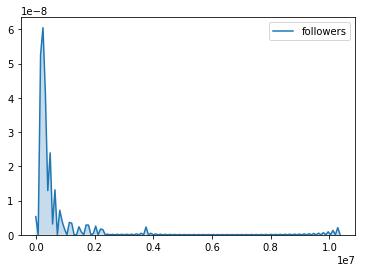

In [196]:
# visualize the distrbuation of followers

sns.kdeplot(saudi_influencer['followers'], shade=True);

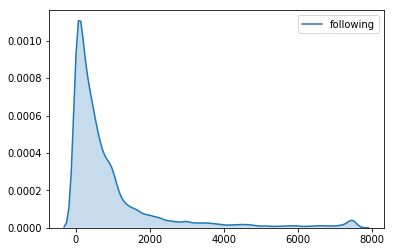

In [197]:
# visualize the distrbuation of following

sns.kdeplot(saudi_influencer['following'], shade=True);

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


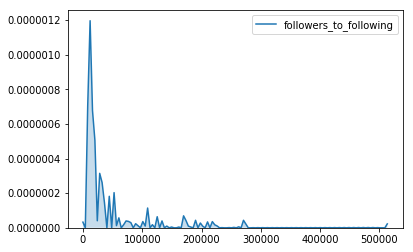

In [198]:
# visualize the distrbuation of followers_to_following

sns.kdeplot(saudi_influencer['followers_to_following'], shade=True);

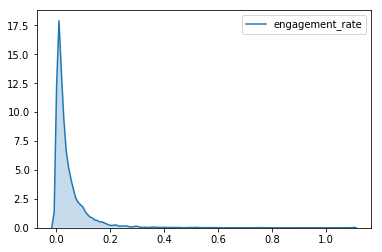

In [199]:
# visualize the distrbuation of engagement_rate

sns.kdeplot(saudi_influencer['engagement_rate'], shade=True);

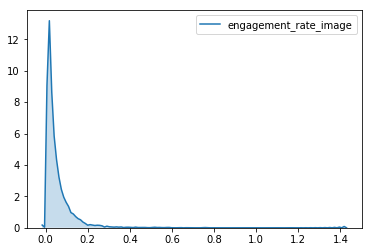

In [200]:
# visualize the distrbuation of engagement_rate_image

sns.kdeplot(saudi_influencer['engagement_rate_image'], shade=True);

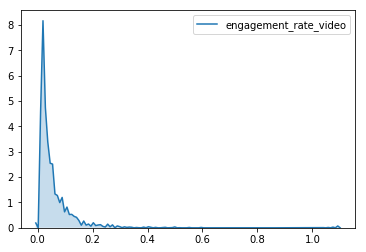

In [201]:
# visualize the distrbuation of engagement_rate_video

sns.kdeplot(saudi_influencer['engagement_rate_video'], shade=True);

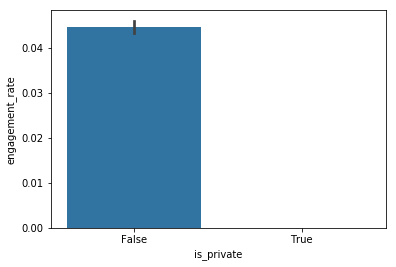

In [202]:
# if the account is private the tool in the api cannt measure the engagment rate (i need to delete private account later)
sns.barplot(x="is_private", y="engagement_rate", data=saudi_influencer);

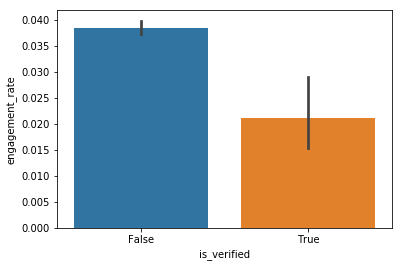

In [203]:
# number of unverfide account are greater than verfied
sns.barplot(x="is_verified", y="engagement_rate", data=saudi_influencer);

- from the Eda & visualization  part above , it seems like there is a trend in cost of post for(photo and images)
also Inverse relationship between no. of followers and engagement rate. Also Positive relationship between no. of followers and cost of post. Moreover, there is a must to delete all privete accounts because there is no values calculated for this account (engagement rate etc.).

### Data Cleaning  

In [205]:
#remove duplicate
saudi_influencer=saudi_influencer.drop_duplicates(subset='username', keep='first')

In [206]:
# remove privet account
indexNames = saudi_influencer[saudi_influencer['is_private']].index
saudi_influencer.drop(indexNames , inplace=True)
 

In [207]:
# remove posts ==0 
indexNames = saudi_influencer[saudi_influencer['posts']==0].index
saudi_influencer.drop(indexNames , inplace=True)

In [208]:
#check shape after deleting 
saudi_influencer.shape 

(6451, 52)

In [209]:
# remove un-active influencer
indexNames=saudi_influencer[(saudi_influencer['engagement_rate'] == 0) & (saudi_influencer['engagement_rate_image'] == 0) &(saudi_influencer['engagement_rate_video']==0)].index
saudi_influencer.drop(indexNames , inplace=True)

In [210]:
#check shape after deleting 
saudi_influencer.shape 

(6446, 52)

In [211]:
# there might be account not posting any photos just vedioe
len(saudi_influencer[saudi_influencer['engagement_rate_image'] == 0])

167

In [212]:
# there might be account not posting any video at all
len(saudi_influencer[saudi_influencer['engagement_rate_video'] == 0])

2756

In [213]:
#Need to see more about these account may be there is a shops or other entities accounts 
len(saudi_influencer[saudi_influencer['following'] == 0])

186

In [214]:
# check non saudi accounts (out of scope) 
saudi_influencer['location_country'].unique() 

array([nan, 'Saudi Arabia', 'Chile', 'United States', 'India', 'Germany',
       'Pakistan', 'Philippines', 'Lebanon', 'Malaysia', 'Turkey',
       'Bahrain', 'Jordan', 'United Kingdom', 'Indonesia', 'Italy',
       'Albania', 'Egypt', 'Greece', 'Guatemala', 'Cameroon', 'Japan',
       'Spain', 'New Zealand', 'Trinidad and Tobago', 'Montenegro',
       'Qatar', 'Tunisia', 'United Arab Emirates', 'Portugal', 'Kuwait',
       'Djibouti', 'South Africa', 'Switzerland', 'Georgia', 'Australia',
       "Lao People's Democratic Republic", 'Austria', 'Estonia',
       'Uzbekistan', 'Netherlands', 'Iraq', 'Thailand', 'Luxembourg',
       'Finland', 'France', 'Canada', 'Mexico', 'Morocco', 'Oman', 'Togo',
       'Norway', 'Macao', 'Jamaica', 'Poland', 'Hungary',
       'Russian Federation', 'Brazil', 'Armenia', 'Niue'], dtype=object)

In [215]:
#save this counteries in a list
countries=['Chile', 'United States', 'India', 'Germany',
       'Pakistan', 'Philippines', 'Lebanon', 'Malaysia', 'Turkey',
       'Bahrain', 'Jordan', 'United Kingdom', 'Indonesia', 'Italy',
       'Albania', 'Egypt', 'Greece', 'Guatemala', 'Cameroon', 'Japan',
       'Spain', 'New Zealand', 'Trinidad and Tobago', 'Montenegro',
       'Qatar', 'Tunisia', 'United Arab Emirates', 'Portugal', 'Kuwait',
       'Djibouti', 'South Africa', 'Switzerland', 'Georgia', 'Australia',
       "Lao People's Democratic Republic", 'Austria', 'Estonia',
       'Uzbekistan', 'Netherlands', 'Iraq', 'Thailand', 'Luxembourg',
       'Finland', 'France', 'Canada', 'Mexico', 'Morocco', 'Oman', 'Togo',
       'Norway', 'Macao', 'Jamaica', 'Poland', 'Hungary',
       'Russian Federation', 'Brazil', 'Armenia', 'Niue']

In [216]:
#check number of these influncers
len(saudi_influencer[saudi_influencer['location_country'].isin(countries)])

265

In [217]:
# explore their accounts
saudi_influencer[(saudi_influencer['location_country'].isin(countries))&(saudi_influencer['followers']>5000)]

id     user_id                username  \
251    85611847  1326217330                jenseer_   
297    83691589  5626706164          raniaalbdullh5   
493    30887585   233487496            amazingrolly   
533   132029507  7715623310              hrhpkhalid   
652      550477   175390435        saraabdullah1421   
670    70544654  1449456623               rero_1ksa   
676      662635   575637464    usmissionsaudiarabia   
1546   30382259   328407502             m7mdalhabib   
1617   31305804  1448224476           espressolabtr   
1665   30908846  1831791621                    0_65   
1669   44048516  1647253179         drfiras_clinics   
1705   28608353  3988848710             free_being_   
1818  141589224   527232763                alqadi34   
1958  315490171  1365297517           khalifaal9an3   
2158  296241954   344495623                mitsuky1   
2198   69146911   369657462             ksa_uterque   
2230   72679084   249429113                 aba_966   
2240  174279075   247420208               peltier11   
2252   28334646  1573880393          mf4photography   
2281  148869362  8404019213    vikentia_patronikola   
2451  248219611  4836870383        quality.standard   
2513     501896     8398591           cedricderodot   
2529   27361094  1581985615            selma_wahida   
2563   80492510  7081199269           veiledbyzahra   
2582   46505192   376377249          dadabhaitravel   
2610   73980711   491119697              hameed1414   
2711       7533  3161552756      malakstarsolutions   
2752   31139785  1685900174                glamazle   
2859   31980587   352289820         garoaccessories   
2871   77397120  1546761738            majou_bijoux   
...         ...         ...                     ...   
8322   32310496  3413841791          shadowbyshaden   
8325   27254303   374827814                  abu350   
8362     429956    12704103                  hesh4m   
8392  147630886  7072178399        ainaziana_estore   
8410   32263361   279248187              shaima.alb   
8419  274699398   485134610       moreandmoresilver   
8421     306636  1489416353      shesaidshesaid_dxb   
8426  113559061  4541304328  rasheedahs_attractions   
8429   32267525  3176536994     islamicillumination   
8469   31582635   469673285                  yoggys   
8471   32705088  1418877210                    i8as   
8556   29535084  1565198351       thesashavalentine   
8578   84018545   245730660              beardedbcn   
8620  111994890   145975681                alreem_h   
8641   82444228   621635948          silvenarabians   
8657   81339408   217588916           arwajewellery   
8662   32650567  4666109180           yasminepalace   
8674  127169935  9258771207              yemenpains   
8683    1140415  5411667230              anotahgirl   
8709   28925100   352096451          tima_love_life   
8735   68843691   207461748         fahadalrashidi7   
8754   82146041  6622811850     abriletnaturearabia   
8776   30035243  3142158503             vibescoffee   
8787  267059127  7210068005            hadi_alawi22   
8798  104714562  5797075568             moto_arabia   
8817    1357096  1574150583             abayaelegan   
8928   29150084  3577485039             godivaqatar   
9012   79511019  4500704322             asmaraia_me   
9036  137470695  3539313219            gamarbinagil   
9039   43187006  7193011683                amaly_sa   

                          full_name first_name     last_name  \
251                  Jenseer Hameed    Jenseer        Hameed   
297                    Rania&Rienad        NaN           NaN   
493                    amazing 🇵🇭🇸🇦     Jeddah   Philippines   
533      خالد بن سلمان بن عبدالعزيز        NaN           NaN   
652    Sara Alsaleh 🕉 سـارة الصالـح       Sara       Alsaleh   
670                   ريهام الرفاعي     Arabia        Jordan   
676       U.S. Mission Saudi Arabia     Arabia     Instagram   
1546              #M7 Photography 📸          M   Photography   
1617                    Es

In [218]:
# Remove the location cunterie that are not saudi
indexNames = saudi_influencer[saudi_influencer['location_country'].isin(countries)].index
 
saudi_influencer.drop(indexNames , inplace=True)


In [219]:
#check shape again
saudi_influencer.shape 

(6181, 52)

In [220]:
#remove non active replies
indexNames=saudi_influencer[(saudi_influencer['replies_per_post'] == 0) & (saudi_influencer['replies_per_post_image'] == 0) &(saudi_influencer['replies_per_post_video']==0)].index
saudi_influencer.drop(indexNames , inplace=True)

In [221]:
saudi_influencer.shape 

(6106, 52)

In [223]:
#drop usless columns
column_to_drop=['first_name', 'last_name',  'location_country' ,'location_region','location_city'
                ,'location_method','gender','is_private','last_post_analyzed','deleted','discovered_at','created_at','updated_at','birth_year','website','emails','language']
saudi_influencer=saudi_influencer.drop(column_to_drop,axis=1)

In [224]:
#drop usless columns
column_to_drop=['business_phone_number','business_address']
saudi_influencer=saudi_influencer.drop(column_to_drop,axis=1)

In [225]:
#drop usless columns
column_to_drop=['id','user_id']
saudi_influencer=saudi_influencer.drop(column_to_drop,axis=1)

In [226]:
#drop usless columns
column_to_drop=['business_email']
saudi_influencer=saudi_influencer.drop(column_to_drop,axis=1)

In [227]:
# rechake columns
saudi_influencer.columns

Index(['username', 'full_name', 'biography', 'cost_post', 'cost_video',
       'followers', 'following', 'followers_to_following', 'is_verified',
       'is_business_account', 'business_category', 'profile_pic_url',
       'profile_pic_url_hd', 'engagement_rate', 'engagement_rate_image',
       'engagement_rate_video', 'likes_per_post', 'likesb_per_post_pct',
       'likes_per_post_image', 'likes_per_post_video', 'replies_per_post',
       'replies_per_post_pct', 'replies_per_post_image',
       'replies_per_post_video', 'views_per_video', 'views_per_video_pct',
       'posts', 'posts_per_week', 'posts_per_analysis', 'categories'],
      dtype='object')

In [228]:
#check if there is accounts whith ['posts'] ==0
len(saudi_influencer[['username','engagement_rate']][saudi_influencer['posts'] ==0])

0

In [229]:
#check if there is accounts whith ['posts'] ==null

len(saudi_influencer['posts'][pd.isnull(saudi_influencer['posts'])])

40

In [230]:
# explore accounts whith ['posts'] ==null
saudi_influencer[pd.isnull(saudi_influencer['posts'])]

username                       full_name  \
234              t_.d1                   Turki✨| ترككي   
235        its.shathaa                         Ꮪhatha.   
319            fat6imh                         فاطِمه.   
332          baanderrr                     بندر العنزي   
408           2m.bisht                          ام بشت   
532              j37r_                             NaN   
560             ftomsu                  FATIMAH SULTAN   
710             iiiv11                        Mariam☤.   
1141           olliix9                      Girl🙎🏽‍♀️.   
1171             v0.xq                   مِــيثث 💛⚚'..   
1924             vs.rz                             Rk.   
1925               z8i                       سوآح..#❤️   
2677   hamishbroughton    Hamish ✈︎ Travel + Adventure   
3037         rozadays_      ⠀ ⠀ ⠀ ⠀ ⠀ ⠀⠀ ⠀⠀ Roza Days🦋   
3067             mt_2m                   BLACK LIGHT ✨   
3075            enuxli                  NAZAT MELYAĞ 🔝   
3268            meadaz                MĘ3AD AZ.ŹHRANI.   
3496        2004_lolo_                       ام اللول🌹   
3549              5fss                     Sultan  🏴⁹⁹   
3828     hattan_nashar                       هتان نشار   
3834          hosuam44                  H.Abdulsalam.✨   
3850             yhy.7                 📲متجر يحيى بدري   
3855        tejamml_77               محمد ﺎل ﻋممـار ♡🔐   
4275           ilayanz                       L.zelaie🎠   
4281               v4v             HmoOoda199 Official   
4462         hanen_558                  hanenalshiki🔱.   
4467             di.v_      عَبدالرحمن بِـن أحـمَـد👨🏻.   
4491            a.x20y    الفَتَـئّ المُـؤَدَبّمَرَا 🙈   
4494          m.h__911         مرحبا ومسهلا ب الجميع❥✋   
4542   fai9al.altamimi  Faisal Altamimi | فيصل التميمي   
4917       msluxury_92                      Echbs💎♐️♞ّ   
4927   makeup.obsessed        Makeup Obsessed By Dyana   
4936            in22__                  ЙОГА | النوُري   
4974      hellobenteoh                        Ben Teoh   
5714              3.iv                غغـبنهّ❈. ⠀ ⠀⠀⠀⠀   
5790             trv.2                             R.f   
6478           ksa2ksa                             NaN   
7417  feda.hairstylist              Saudi Hairstylist✨   
7563            falavs                       فــلا ..🌸   
7928      laura___chan               🌌غدير|GHADEER👩🏽‍🚀   

                                              biography  cost_post  \
234          🌜snapchat | iitt19\nSaudi Arabia, Jeddah📍.      170.0   
235                   Saudi Arabia, Jeddah🇸🇦 \n31 dec❤️      520.0   
319    Saudi Arabia • الشرقيه🇸🇦📍.\n"البساطه نصف الجمال"      100.0   
332   Saudi Arabia |1992\nPhotography \n"\n"\nAlkhob...      300.0   
408   ‏•Kingdom of Saudi Arabia🇸🇦\n•سأكون كوميديانة ...      110.0   
532   Smile, the world will not change in your grief...      390.0   
560   You can do anything in this life🧚🏻‍♀️\nSaudi A...      100.0   
710   - My heart is full of you,only you.🖤\n- Saudi ...      110.0   
1141  9,1996🌟.\nSaudi Arabia🇸🇦.\nSmile,you are beaut...      120.0   
1171  Saudi Arabia⚜🇸🇦'\nمصممه| M,69🎬♥.\nمشرفة|دعم بد...      280.0   
1924  Saudi arabia | jeddah 🇸🇦\nAfter all patience ,...      150.0   
1925  أسهر معي والعمر رآيح وفآني..!\nنكُتب مِن الشعْ...      450.0   
2677  ↟   Adventurer | Photographer | Blogger \n↬   ...      160.0   
3037  ⠀⠀⠀⠀⠀⠀⠀ ⠀KINGDOM OF SAUDI ARABIA \n⠀⠀⠀⠀⠀"🌸💗. ....      140.0   
3067  ωєℓcσмє τσ мy αccσυиτ ✨\n،\nان كنت تريد قتل ال...      460.0   
3075  ilayda ildir / Eren vurdem\nnazat💞\nBERKAY HAR...      130.0   
3268  Queen of august \nSaudi Arabia #Taif 📍🇸🇦. \nA ...      100.0   
3496  My name :amal🌷\nage:15\nFrom Syria🇸🇾 I live in...      100.0   
3549                  proud to be saudi\nsnapchat: c-2L      440.0   
3828  Work at kau \nTrainer at smart fitness  🥇🏋🏻‍♂️...      150.0   
3834  * ‏ليس مهما كيف يراك الاخرين \n‏ المهم كيف ترى...      470.0   
3850  كفرات جوالات / سماعات / شواحن / راوتر / جوالات...      180.0   
3855  مصور فتغرافي📸 .\nتا

In [231]:
# drop accounts whith ['posts'] ==null
saudi_influencer.drop(saudi_influencer[pd.isnull(saudi_influencer['posts'])].index,inplace =True)

In [232]:
# check if followers_to_following is nan for some accounts
len(saudi_influencer[['followers','following']][pd.isnull(saudi_influencer['followers_to_following'])])

171

In [233]:
# drop nan values in followers_to_following  
saudi_influencer.drop(saudi_influencer[pd.isnull(saudi_influencer['followers_to_following'])].index,inplace=True)

In [235]:
# if accounts are registerd as a bussines (out of the project scop like companies and shops i will delete them )
saudi_influencer['business_category'].unique()

array(['Non-Profits & Religious Organizations', nan, 'General Interest',
       'Creators & Celebrities', 'Business & Utility Services',
       'Personal Goods & General Merchandise Stores', 'Local Events',
       'Auto Dealers', 'Content & Apps', 'Lifestyle Services',
       'Publishers', 'Professional Services', 'Home Goods Stores',
       'Restaurants', 'Transportation & Accomodation Services',
       'Home Services', 'Grocery & Convenience Stores',
       'Food & Personal Goods', 'Government Agencies', 'Home & Auto',
       'Entities'], dtype=object)

In [236]:
# drop Non-Profits & Religious Organizations
saudi_influencer.drop(saudi_influencer[(saudi_influencer['business_category']=='Non-Profits & Religious Organizations')].index,inplace=True)

In [238]:
# drop Business & Utility Services
 
saudi_influencer.drop(saudi_influencer[(saudi_influencer['business_category']=='Business & Utility Services')].index,inplace=True)

In [240]:
# drop Restaurants

saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Restaurants'].index,inplace=True)

In [241]:
# drop Content & Apps
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Content & Apps'].index,inplace=True)

In [243]:
# drop Home Goods Stores
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Home Goods Stores'].index,inplace=True)

In [245]:
# drop Transportation & Accomodation Services
saudi_influencer[saudi_influencer['business_category']=='Transportation & Accomodation Services']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Transportation & Accomodation Services'].index,inplace=True)

In [246]:
# drop Government Agencies
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Government Agencies'].index,inplace=True)

In [248]:
#drop Grocery & Convenience Stores
len(saudi_influencer[saudi_influencer['business_category']=='Grocery & Convenience Stores'])
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Grocery & Convenience Stores'].index,inplace=True)

In [251]:
#  General Interest catogay containes indvidual so i will leave it 
len(saudi_influencer[saudi_influencer['business_category']=='General Interest'])
saudi_influencer[saudi_influencer['business_category']=='General Interest']  

username                       full_name  \
2                     6caa                 Rola Al Shehri.   
49                  suenv1                           SARA.   
51                  vxrrvx                    أميرة سلمان.   
61            noof_salem12                            nova   
77              hanadi.017                 هنَادي ال مِحسن   
78                  gvoona                          GVOONA   
88          ivannaromaniuk                 Ivanna Romaniuk   
89                    2i2d                              BR   
92            rawan_shrari                        𝐑𝐀𝐖𝐀𝐍 |📸   
128            lamaalshawi                    Lama Alshawi   
137                 inuori                        NS | نور   
173                amjaiid                          أمّجاد   
181                roof_ma                          Roof !   
184                 wilix7                  WEJDAN | وجدان   
189                gucci.9                          قوتشي🥀   
209                 r7000_                           яεεм🐱   
240                 cliz53                      𓆩ᏟᏞᎥᏃ𓆪 ⁵³.   
257                  a7vmd                  Ahmad Bin Naif   
258               enji2000                            انجي   
265              noura_302               Noura Ibrahim⚜️.'   
268              the_nayef       نايف جلخف - Nayef Jalkhaf   
273             k_mohamad1                       K.mohamad   
277                pllk777                     تيم سلطان 𖤐   
284               lamoshh1                          LAMA♑︎   
285        mohamed_albarqi  محمد البارقي | Mohamed Albarqi   
286           noraalfraikh                            Nora   
287               tala.sub                 تالا السبيعي 🇸🇦   
308                 isda7_                    سعد | Saad .   
346              ix_manols                 | 마날의 | 🎓 ❈ 🌾 .   
358             sister_bex                .Balqees Ⅱ أريام   
...                    ...                             ...   
8206         abbasalshyokh                     عباس الشيوخ   
8210              wjood_02                    وجود الدوسري   
8296            amnastudio                     AMNA STUDIO   
8320           tasmeemfair               Design Initiative   
8395           r.abduallah             المصورة رقية إدعيبل   
8465                  n_eb                         فيصل 🇸🇦   
8482             mikuas911           M A L A K 👼🏼 | مـَلآك   
8490          noufalrashdi                  Nouf Alrashdi♋   
8509           hanouf12345                    هنوف الشمري💙   
8537         dany_mansor11             داني ميك اب ارتست 💄   
8581         posters_saudi                   ‎لوحات فنية 🏞   
8594                 vnx92                 Noura Abdullah🛍   
8606  monareemaphotography   Mona Alyedreessy منى الإدريسي   
8624          suaramadinah                    suaramadinah   
8635           ipink_dream         Pink Dream 🎨بشرى الشريف   
8671           posters_bah                   لوحات فنية  🏞   
8693            alwafey907          أحمد عبدالواحد الحموان   
8702          jasminebager       Jasmine Bager, Journalist   
8729          photo_asalah                  Asalah|أصالة 📽   
8748           aryafalodah                  ارياف العوده 🎓   
8757              trarabia              TR Arabia مهدي كمخ   
8887          saudipanther     SAUDI PANTHER | سعودي بانثر   
8981                noufay   Nouf Alismail || نوف السماعيل   
8982               gk.cafe            Golden KangaroO Cafe   
8991                 axp.1                       عباآدي ⚡🔥   
9011             3un_photo                    tag | قاسم 📸   
9030            thelabelnz                       The Label   
9045       et_world_arabia  ET World Arabia أخبار المشاهير   
9058           kasumshaffi            KASUM SHAFFI  LONDON   
9060       saudiartscenter       Saudi Center For Fine Art   

                                              biography  cost_post  \
2                                       Saudi Arabia 🇸🇦      860.0   
49                               

In [252]:
#Creators & Celebrities containes indvidual so i will leave it 
print(len(saudi_influencer[saudi_influencer['business_category']=='Creators & Celebrities']))
saudi_influencer[saudi_influencer['business_category']=='Creators & Celebrities']  

1274


username                       full_name  \
5               hatem_alaed                    حاتم العيد🇸🇦   
9                   amg2507                        AMG GANG   
10                  gsooorn               مكافحة الحلوين 😍🍭   
16                  r20_otb                               _   
18                    i4bdr                             بدر   
28                   brvits                           SAMIH   
43               ebrahimal7            Ebrahim Alabdullatef   
45                     4x.m                        Manarzh.   
54                  ruba_we                             ربا   
76                   mohmvd                     محمد العيسى   
79            thenoonbeauty                Beauty blogger 💄   
83                 l_queen1                             NaN   
90                   hla86_           H A L A S A A D | هلا   
97               rafalhabib                     rafal habib   
100                  xsa_ra                          سـاره.   
102                 fsl_107                          Faisal   
103                    pqa_                          هاني 🌱   
125              choirudiho                             رغد   
133                   mqh82              Mohammed AlQahtani   
138           fashionbyfofo     Fowzia Alsaeed فوزية السعيد   
157                    9pua             خالد بن عبدالرحمن☤.   
165                 n.w.r.i                           🍁nwri   
180                 sulvixu                      Soul | سول   
186                 i_monya               Monya Albedeiwi ⭐   
197                irashedz                   راشد | Rashed   
222                wtin1237                          وتين👒.   
223                    c1wl                نوره السعيد🧞‍♀️.   
229                lilmoooo                Mohammed Bafrhan   
230              ethar.rose                          ايثار🌱   
242                 liliup_                     ناژ | Naz .   
...                     ...                             ...   
8843           beroaltamimi                     عبير | bero   
8845           alsaidy_aziz            Abdulaziz Alsaeedi 😊   
8860                 shf0uq                              ‏𓁿   
8862       mamabeba_reviews             Mama Beba's Reviews   
8864                    fm9             سلطان الدوسري❤️سطوف   
8897             roqaya_ali        رقية النطار Saudi Artist   
8898  reemabdualaziz_makeup    ريم عبدالعزيز🌸 Saudi🇸🇦Artist   
8924              essyounis                    Esaad Younes   
8931               eyad_w.s   Eyad Samrgandi إياد سمرقندي🇸🇦   
8934            nirvas_saif                     NirVas Saif   
8946            salehsurujy        Captain Sarko | ACSM CPT   
8954                alaoo_1  Ali Alkhuwaildi | علي الخويلدي   
8958     deenaaljuhanidaily         Deena Al-Juhani (Daily)   
8959              3bdalbas6                          💯☆○•°♧   
8969             alyousif90                    Ali Alyousif   
8970           leonard_gado    YOUTUBE VLOGGER يوتيوب فيديو   
8975                wahabfs       WAHAB THE FREESTYLER ⚽️🇰🇼   
8987       elmasrymohamed74                 Mohamed Elmasry   
9014            carlosb_iam             Carlos B I Official   
9019               borkan88                           Rakan   
9021              raghadraa   Makeup Artist Raghad Zamzami💄   
9022          wheremyfoodat  Dubai Food Bloggers- Kim & Den   
9023       saudi.life.style                 nourah ALfahad🌴   
9037             helen_4000                          Helen🎶   
9042        iamasmaabdullah                 Asma’a Abdullah   
9043            nawaf_3waji        ✨نواف عواجي|Nawaf 3waji✨   
9047     flavours_of_arabia      Flavours of Arabia By Noha   
9052              muhammda_            Muhammda محمد البقشي   
9069             salem_alg_  سالم القثمي Jet Ski Racer 🏁🏆🇸🇦   
9079          saudiblogging  Saudi Blogging 🇸🇦 By H a i f a   

                                              biography  cost_post  \
5                                      Sau

In [253]:
# drop Personal Goods & General Merchandise Stores
print(len(saudi_influencer[saudi_influencer['business_category']=='Personal Goods & General Merchandise Stores']))
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Personal Goods & General Merchandise Stores'].index, inplace=True) 
 

528


In [256]:
# drop  Local Events
print(len(saudi_influencer[saudi_influencer['business_category']=='Local Events']))

saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Local Events'].index,inplace=True)


52


In [258]:
# drop Auto Dealers'
print(len(saudi_influencer[saudi_influencer['business_category']=='Auto Dealers']))
saudi_influencer[saudi_influencer['business_category']=='Auto Dealers']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Auto Dealers'].index,inplace=True)

53


In [259]:
# drop Lifestyle Services
saudi_influencer[saudi_influencer['business_category']=='Lifestyle Services']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Lifestyle Services'].index,inplace=True)

In [261]:
# drop Publishers
saudi_influencer[saudi_influencer['business_category']=='Publishers']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Publishers'].index,inplace=True)

In [262]:
# drop Professional Services
saudi_influencer[saudi_influencer['business_category']=='Professional Services']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Professional Services'].index,inplace=True)

In [264]:
# drop Food & Personal Goods
saudi_influencer[saudi_influencer['business_category']=='Food & Personal Goods']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Food & Personal Goods'].index,inplace=True)

In [266]:
# drop Home & Auto
saudi_influencer[saudi_influencer['business_category']=='Home & Auto']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Home & Auto'].index,inplace=True)

In [267]:
# drop Home Services
saudi_influencer[saudi_influencer['business_category']=='Home Services']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Home Services'].index,inplace=True)

In [269]:
# drop Entities
saudi_influencer[saudi_influencer['business_category']=='Entities']
saudi_influencer.drop(saudi_influencer[saudi_influencer['business_category']=='Entities'].index,inplace=True)

In [271]:
# check info after cleaning
saudi_influencer.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 1 to 9079
Data columns (total 30 columns):
username                  4348 non-null object
full_name                 4197 non-null object
biography                 4319 non-null object
cost_post                 4348 non-null float64
cost_video                4348 non-null float64
followers                 4348 non-null int64
following                 4348 non-null int64
followers_to_following    4348 non-null float64
is_verified               4348 non-null bool
is_business_account       4313 non-null object
business_category         1684 non-null object
profile_pic_url           4348 non-null object
profile_pic_url_hd        4348 non-null object
engagement_rate           4348 non-null float64
engagement_rate_image     4348 non-null float64
engagement_rate_video     4348 non-null float64
likes_per_post            4348 non-null float64
likesb_per_post_pct       4348 non-null float64
likes_per_post_image      4348 non-null flo

In [276]:
# check how mny influncers are classified into catogries
Cat_not_null=saudi_influencer['categories'][(pd.isnull(saudi_influencer['categories'])==False)&(saudi_influencer['categories']!='[]')]

In [277]:
# out of 4348 influencer there is 647
len(Cat_not_null)

647

## Clean categories column

- More than halfe of influencer without catogerie so i will count the unique catogrie that is in the categories 
column and then i will cluster the data with k of this catogeries.

In [278]:
# Clean the Category_name by removing  special charecters
Cat_not_null= Cat_not_null.map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))

In [279]:
Cat_not_null

79      'Blogging', 'Business', 'and', 'Economy', 'Bea...
133                                         'Photography'
194                                                 'Art'
260                                              'Design'
274                                                 'Art'
282                                              'Design'
284                                             'Writing'
287                                            'Modeling'
295                                            'Modeling'
329             'Humanities', 'Food', 'Fashion', 'Travel'
330                                              'Design'
334                          'Business', 'and', 'Economy'
337                                                  'TV'
339                                             'Fitness'
391                                              'Design'
394                                                 'Art'
404                                           'Marketing'
432           

In [280]:
# from NLTK i wiil use Porter stemmer to count duplicated catogries as one
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
 

In [281]:
# some influencer they have multiple catogreies so i will split them 
for i in range(len(Cat_not_null)):
    splitted_cat=Cat_not_null.iloc[i].split(',')
    Cat_not_null.iloc[i]=""
    for j in range(len(splitted_cat)):
        Cat_not_null.iloc[i]=Cat_not_null.iloc[i]+str(re.findall('\w+',splitted_cat[j])).strip('[]').strip('and')
    

In [282]:
cat_finall_str=""

In [283]:
# save splitted catogeries in one long string
for i in range(len(Cat_not_null)):
    cat_finall_str=cat_finall_str+ str(Cat_not_null.iloc[i]).strip('[]')

In [810]:
cat_finall_str

"'Blogging''Business''and''Economy''Beauty''and''Cosmetics''Photography''Art''Design''Art''Design''Writing''Modeling''Modeling''Humanities''Food''Fashion''Travel''Design''Business''and''Economy''TV''Fitness''Design''Art''Marketing''Design''Cars''Travel''Photography''Art''Lifestyle''Nature''Design''Entertainment''Music''Nature''Photography''Education''Travel''Modeling''Music''Food''Design''Fashion''Modeling''Photography''Fashion''Racing''Design''Music''Music''Mommy''Modeling''Soccer''Soccer''Fashion''Racing''Travel''Fashion''Modeling''Art''Photography''Fitness''Design''Photography''Travel''Art''Design''Design''Gaming''TV''Radio''Technology''Media''Fashion''Photography''Fashion''Design''Luxury''Lifestyle''Photography''Travel''Photography''Modeling''Fashion''Design''Fitness''Art''Photography''Modeling''Photography''Design''Racing''Art''Business''and''Economy''Modeling''Cars''Sports''Design''Art''Science''Fashion''Design''Fashion''Blogger''Fashion''Photography''Photography''Wedding''Design

In [284]:
 # do  stemming and tokeniz and bag of words to this catogeries
# Tokenize  
tokens2 = word_tokenize(cat_finall_str)
english_stops = set(stopwords.words('english'))
# Convert the tokens into lowercase: lower_tokens
lower_tokens2 = [porter.stem(t.lower())for t in tokens2 if t not in english_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple2 = Counter(lower_tokens2)

 



In [285]:
# get most commen
commen_words2=bow_simple2.most_common(1000)

In [286]:
# update some miss spelining values
commen_words2[9]=('blog', 41)

In [287]:
commen_words2.remove(("'blog", 1))

In [288]:
#commen_words2.remove(('blog', 22))

In [289]:
commen_words2.remove(('blogger', 18))

In [290]:
commen_words2.remove(("'", 1))

In [291]:
commen_words2.remove(("''", 1035))

In [292]:
# sort them (there is 70 different catogeries for 4348 row)
commen_words2.sort()
print("simple sort")
len(commen_words2) 

simple sort


70

In [294]:
# found 3 more non indvadual account with following =0
len(saudi_influencer['username'][saudi_influencer['following']==0])

3

In [295]:
# drop this accounts
saudi_influencer.drop(saudi_influencer[saudi_influencer['following']==0].index,inplace=True)

In [296]:
len(saudi_influencer['username'][saudi_influencer['following']==0])

0

In [297]:
saudi_influencer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4345 entries, 1 to 9079
Data columns (total 30 columns):
username                  4345 non-null object
full_name                 4194 non-null object
biography                 4316 non-null object
cost_post                 4345 non-null float64
cost_video                4345 non-null float64
followers                 4345 non-null int64
following                 4345 non-null int64
followers_to_following    4345 non-null float64
is_verified               4345 non-null bool
is_business_account       4311 non-null object
business_category         1683 non-null object
profile_pic_url           4345 non-null object
profile_pic_url_hd        4345 non-null object
engagement_rate           4345 non-null float64
engagement_rate_image     4345 non-null float64
engagement_rate_video     4345 non-null float64
likes_per_post            4345 non-null float64
likesb_per_post_pct       4345 non-null float64
likes_per_post_image      4345 non-null flo

## Creating different catogeries  and extract them from the fullname and biography

- in this section i will use fullname and biography to classify influencers .

In [301]:
# start cleaning the dull name by stamming to remove icons emojies and so on 
fullname_string=[]

In [302]:
# from NLTK use Porter stemmer 
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [303]:
# fill nan with space
saudi_influencer['full_name'].fillna('',inplace=True)

In [304]:
# use emoji method to remove it from name
def replace_emoji_space(string):
    # Emojis pattern
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                u"\u200f"
    "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

In [305]:
#apply the emoji method to the full name column
saudi_influencer["full_name_no_emoji"] = saudi_influencer["full_name"].map(lambda x:  replace_emoji_space(x))

In [306]:
# not all emojies removed 
saudi_influencer["full_name_no_emoji"]

1                               sabar 
2                      Rola Al Shehri.
3                                  ⑤ ⑨
5                          حاتم العيد 
6             إيفين محمد|Evin Mohammed
9                             AMG GANG
10                    مكافحة الحلوين  
11                           منوريننن 
16                                   _
18                                 بدر
23                               S.B.7
24                                ملاك
28                               SAMIH
31                           احمد فلقي
32                        Channie Avis
34                  }{ Eng.Abdullah }{
36                         خالدالهلالي
37                              عَسع  
39                        سلطان،الشهري
41                 مشاري عليان الطهيمي
43                Ebrahim Alabdullatef
44                     طلال بن مساعد  
45                            Manarzh.
47                      رغد الولِيدي  
49                               SARA.
50                       

In [132]:
# some text in full name or biography are in arabic 
# herei will test the translation library and my api key from YandexTranslate
translatedList = []

In [156]:
from yandex_translate import YandexTranslate
translate = YandexTranslate('trnsl.1.1.20190514T095155Z.f9f6f1275f787f6d.04122ec5a7af30be83ac97ea5ba995e60251444f')
traduction = translate.translate('bonjour', 'fr-ar')
print(traduction)

{'code': 200, 'lang': 'fr-ar', 'text': ['مرحبا']}


In [158]:
traduction['text'][0]

'مرحبا'

In [307]:
# Cleaning the full name column and using stemming  and remove stop words  
for i in range(len(saudi_influencer)):
    new_word=''
    input_str=saudi_influencer['full_name'].iloc[i]
    english_stops = set(stopwords.words('english'))
    input_str=word_tokenize(input_str)
    lower_tokens=[t.lower() for t in input_str if t not in english_stops]
    for word in lower_tokens:
        
        new_word=new_word+' '+porter.stem(word)
    fullname_string.append(re.findall("\w+",new_word))
    

In [308]:
len(fullname_string)

4345

In [603]:
# I tries google library it didnot work
#for index, row in saudi_influencer.iterrows():
    # REINITIALIZE THE API
   # translator = Translator()
    #try:
       # translated = translator.translate(row['full_name'], dest='en')
        #saudi_influencer.set_value(index, 'full_name', translated.text)
   # except Exception as e:
        #print(str(e))
       # continue
#saudi_influencer["full_name"].iloc[7]


In [309]:
# start stemming biography to remove emojies
biography_string=[]

In [310]:
# fill nan
saudi_influencer['biography'].fillna('',inplace=True)

In [311]:
# Cleaning the biography  column and using stemming  and remove stop words  
for i in range(len(saudi_influencer)):
    new_word=''
    input_str=saudi_influencer['biography'].iloc[i]
    english_stops = set(stopwords.words('english'))
    input_str=word_tokenize(input_str)
    lower_tokens=[t.lower() for t in input_str if t not in english_stops]
    for word in lower_tokens:
        
        new_word=new_word+' '+porter.stem(word)
    biography_string.append(re.findall("\w+",new_word))

In [312]:
len(biography_string)

4345

In [313]:
#next combine cleaning values full_name_biography
full_name_biography_string=[]

In [314]:
for i in range(len(biography_string)):
    biography_string[i]=fullname_string[i]+biography_string[i]

In [315]:
full_name_biography_string=biography_string

In [316]:
saudi_influencer['full_name_biography_string']=full_name_biography_string

In [317]:
saudi_influencer['full_name_biography_string_nonnull']=saudi_influencer['full_name_biography_string'].map(lambda x:str(x).strip('[').strip(']').replace('saudi','').replace('arabia',"").replace('riyadh',''))

In [318]:
saudi_influencer['full_name_biography_string_nonnull']


1                                         'sabar', '', ''
2                          'rola', 'al', 'shehri', '', ''
3                                           '⑤⓪⑨', '', ''
5                                 'حاتم', 'العيد', '', ''
6                'إيفين', 'محمد', 'evin', 'moham', '', ''
9                                   'amg', 'gang', '', ''
10                            'مكافحة', 'الحلوين', '', ''
11                                     'منوريننن', '', ''
16                                            '_', '', ''
18                                          'بدر', '', ''
23                                  's', 'b', '7', '', ''
24                                         'ملاك', '', ''
28                                        'samih', '', ''
31                                 'احمد', 'فلقي', '', ''
32                                'channi', 'avi', '', ''
34                              'eng', 'abdullah', '', ''
36                                  'خالدالهلالي', '', ''
37            

In [319]:
#reset index after cleaning
saudi_influencer=saudi_influencer.reset_index(drop=True)

In [202]:
#explore finall values of influncer
len(saudi_influencer[['username','full_name_biography_string_nonnull']][saudi_influencer['followers']<2000])


1259

In [207]:
#explore finall values of influncer

len(saudi_influencer[['username','full_name_biography_string_nonnull']][(saudi_influencer['followers']<5000)& (saudi_influencer['followers']>2000)]) 


1154

In [208]:
#explore finall values of influncer

len(saudi_influencer[['username','full_name_biography_string_nonnull']][(saudi_influencer['followers']<20000)& (saudi_influencer['followers']>5000)]) 


1251

In [209]:
#explore finall values of influncer

len(saudi_influencer[['username','full_name_biography_string_nonnull']][(saudi_influencer['followers']<100000)& (saudi_influencer['followers']>20000)]) 


510

In [210]:
#explore finall values of influncer

len(saudi_influencer[['username','full_name_biography_string_nonnull']][(saudi_influencer['followers']<1000000)& (saudi_influencer['followers']>100000)]) 


156

In [211]:
#explore finall values of influncer

len(saudi_influencer[['username','full_name_biography_string_nonnull']][(saudi_influencer['followers']>1000000)]) 


13

In [213]:
#explore finall values of influncer

saudi_influencer[['username','full_name_biography_string_nonnull']][(saudi_influencer['followers']>1000000)]

username                 full_name_biography_string_nonnull
356         _om__sarah_  'ام', 'سارة', 'طبخات', 'سهله', 'ماشاءالله', 'ا...
1296           rajeh_90  'راجح', 'الحارثي', 'tv', 'presenter', 'travel'...
1407          model_roz  'model', 'roz', 'the', 'first', 'femal', 'mode...
3403       almaneasaeed  'سعيد_بن_مانع', '', 'poet', 'للحصول', 'على', '...
3424      misho_baeshen  'hisham', 'baeshen', 'هشام', 'باعشن', '', 'foo...
3444      warda_sowimel  'warda', 'sowimel', '', 'busi', 'woman', 'base...
3464         fayezalmal  'فايز', 'المالكي', 'fayez', 'al', 'malki', '',...
3531     bafetimbigomis  'gomi', 'profession', 'footbal', 'player', 'al...
3616     saudireporters  '', 'report', 'كون', 'ريبورتر', 'واصنع', 'التا...
3650               fmb4  'فراس', 'بقنه', 'fera', 'bugnah', '', 'tv', 'p...
3980    mutlaq_alsultan  'mutlaq', 'alsultan', 'مطلق', 'السلطان', '', '...
4142  nawaf.2424.alabid  'nawaf', 'alabid', 'offici', 'account', 'nawaf...
4160      nermin_mohsen  'نيرمين', 'محسن', 'zh', '', 'n', 'actress', 'ل...

In [218]:
columns_to_delete=['categories','full_name' ,'biography','is_business_account','business_category','profile_pic_url','profile_pic_url_hd',  
                   'categories']

In [541]:
saudi_influencer.drop(columns_to_delete, axis=1)

In [320]:
saudi_influencer['full_name_biography_string_nonnull'].iloc[1]

"'rola', 'al', 'shehri', '', ''"

## Start translating combined values using yandex translator library and api

In [335]:
# i will divide dataframe rows into 25 ranges and translate values after that i will ave each group in list and then i will extend this list togather to perform the new cleaned translated combined full_name_biography
list_full_name_biography_string=[]

In [336]:
for i in range(50):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string.append(traduction['text'][0])
 

In [542]:
len(list_full_name_biography_string)

50

In [338]:
list_full_name_biography_string_1=[]

In [339]:
for i in range(50,100):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_1.append(traduction['text'][0])
 

In [543]:
len(list_full_name_biography_string_1)

50

In [343]:
list_full_name_biography_string_2=[]

In [344]:
for i in range(100,150):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_2.append(traduction['text'][0])
 

In [544]:
len(list_full_name_biography_string_2)

50

In [346]:
list_full_name_biography_string_3=[]

In [347]:
for i in range(150,300):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_3.append(traduction['text'][0])
 

In [545]:
len(list_full_name_biography_string_3)

150

In [355]:
list_full_name_biography_string_4=[]

In [356]:
for i in range(300,450):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_4.append(traduction['text'][0])
 

In [546]:
len(list_full_name_biography_string_4)

150

In [367]:
list_full_name_biography_string_5=[]

In [368]:
for i in range(450,600):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_5.append(traduction['text'][0])
 

In [547]:
len(list_full_name_biography_string_5 )

150

In [377]:
list_full_name_biography_string_6=[]

In [378]:
for i in range(600,750):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_6.append(traduction['text'][0])
 

In [548]:
len(list_full_name_biography_string_6)

150

In [380]:
list_full_name_biography_string_7=[]

In [381]:
for i in range(750,900):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_7.append(traduction['text'][0])
 

In [549]:
len(list_full_name_biography_string_7)

150

In [383]:
list_full_name_biography_string_8=[]

In [384]:
for i in range(900,1050):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_8.append(traduction['text'][0])
 

In [550]:
len(list_full_name_biography_string_8)

150

In [386]:
list_full_name_biography_string_9=[]

In [387]:
for i in range(1050,1200):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_9.append(traduction['text'][0])
 

In [551]:
len(list_full_name_biography_string_9)

150

In [390]:
list_full_name_biography_string_10=[]

In [391]:
for i in range(1200,1350):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_10.append(traduction['text'][0])
 

In [552]:
len(list_full_name_biography_string_10)

150

In [393]:
list_full_name_biography_string_11=[]

In [394]:
for i in range(1350,1500):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_11.append(traduction['text'][0])
 

In [553]:
len(list_full_name_biography_string_11)

150

In [396]:
list_full_name_biography_string_12=[]

In [397]:
for i in range(1500,1650):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_12.append(traduction['text'][0])
 

In [554]:
len(list_full_name_biography_string_12)

150

In [399]:
list_full_name_biography_string_13=[]

In [400]:
for i in range(1650,1800):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_13.append(traduction['text'][0])
 

In [555]:
len(list_full_name_biography_string_13)

150

In [408]:
from yandex_translate import YandexTranslate
translate = YandexTranslate('trnsl.1.1.20190514T230154Z.7a80a9f529f0a84b.31edffa479954b55b21ce102e9b31622d373a409')

In [420]:
list_full_name_biography_string_14=[]

In [421]:
for i in range(1800,1900):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_14.append(traduction['text'][0])
 

In [423]:
len(list_full_name_biography_string_14)

100

In [482]:
saudi_influencer['full_name_biography_string_nonnull'].iloc[1900]='nan' 

In [483]:
saudi_influencer['full_name_biography_string_nonnull'].iloc[1901]='nan' 

In [484]:
list_full_name_biography_string_15=[]

In [485]:
for i in range(1900,2050):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_15.append(traduction['text'][0])
    print(i)

 

1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049


In [486]:
len(list_full_name_biography_string_15)

150

In [490]:
saudi_influencer['full_name_biography_string_nonnull'][saudi_influencer['full_name_biography_string_nonnull']=='']

2265    
2604    
Name: full_name_biography_string_nonnull, dtype: object

In [494]:
saudi_influencer['full_name_biography_string_nonnull'].iloc[2265] ='nan'  


In [495]:
saudi_influencer['full_name_biography_string_nonnull'].iloc[2604]='nan' 


In [496]:
list_full_name_biography_string_16=[]

In [497]:
for i in range(2050,2300):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_16.append(traduction['text'][0])
    
 

In [499]:
len(list_full_name_biography_string_16)

250

In [500]:
list_full_name_biography_string_17=[]

In [501]:
for i in range(2300,2550):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_17.append(traduction['text'][0])
 

In [503]:
len(list_full_name_biography_string_17)

250

In [506]:
list_full_name_biography_string_18=[]

In [507]:
for i in range(2550,2800):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_18.append(traduction['text'][0])
 

In [509]:
len(list_full_name_biography_string_18)

250

In [510]:
list_full_name_biography_string_19=[]

In [511]:
for i in range(2800,3050):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_19.append(traduction['text'][0])
 

In [513]:
len(list_full_name_biography_string_19)

250

In [514]:
list_full_name_biography_string_20=[]

In [515]:
for i in range(3050,3300):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_20.append(traduction['text'][0])
 

In [517]:
len(list_full_name_biography_string_20)

250

In [518]:
list_full_name_biography_string_21=[]

In [519]:
for i in range(3300,3550):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_21.append(traduction['text'][0])
 

In [521]:
len(list_full_name_biography_string_21)

250

In [522]:
list_full_name_biography_string_22=[]

In [523]:
for i in range(3550,3800):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_22.append(traduction['text'][0])
 

In [525]:
len(list_full_name_biography_string_22)

250

In [526]:
list_full_name_biography_string_23=[]

In [527]:
for i in range(3800,4050):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_23.append(traduction['text'][0])
 

In [529]:
len(list_full_name_biography_string_23)

250

In [530]:
list_full_name_biography_string_24=[]

In [531]:
for i in range(4050,4300):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_24.append(traduction['text'][0])
 

In [533]:
len(list_full_name_biography_string_24)

250

In [534]:
len(saudi_influencer)

4345

In [ ]:
list_full_name_biography_string_25 =[]

In [531]:
for i in range(4050,4300):
    text=saudi_influencer['full_name_biography_string_nonnull'].iloc[i]
    traduction = translate.translate(text, 'ar-en')
    list_full_name_biography_string_24.append(traduction['text'][0])
 

In [557]:
len(list_full_name_biography_string_25)

45

In [564]:
final_combined_name_biography= list_full_name_biography_string

In [566]:
len(final_combined_name_biography)

50

In [567]:
final_combined_name_biography.extend(list_full_name_biography_string_1)

In [568]:
len(final_combined_name_biography)

100

In [569]:
final_combined_name_biography.extend(list_full_name_biography_string_2)

In [570]:
len(final_combined_name_biography)

150

In [571]:
final_combined_name_biography.extend(list_full_name_biography_string_3)

In [572]:
len(final_combined_name_biography)

300

In [573]:
final_combined_name_biography.extend(list_full_name_biography_string_4)

len(final_combined_name_biography)

450

In [574]:
final_combined_name_biography.extend(list_full_name_biography_string_5)

In [575]:
len(final_combined_name_biography)

600

In [576]:
final_combined_name_biography.extend(list_full_name_biography_string_6)

len(final_combined_name_biography)

750

In [577]:
final_combined_name_biography.extend(list_full_name_biography_string_7)

len(final_combined_name_biography)

900

In [578]:
final_combined_name_biography.extend(list_full_name_biography_string_8)

len(final_combined_name_biography)

1050

In [579]:
final_combined_name_biography.extend(list_full_name_biography_string_9)

len(final_combined_name_biography)

1200

In [580]:
final_combined_name_biography.extend(list_full_name_biography_string_10)

len(final_combined_name_biography)

1350

In [581]:
final_combined_name_biography.extend(list_full_name_biography_string_11)

len(final_combined_name_biography)

1500

In [582]:
final_combined_name_biography.extend(list_full_name_biography_string_12)

len(final_combined_name_biography)

1650

In [583]:
final_combined_name_biography.extend(list_full_name_biography_string_13)

len(final_combined_name_biography)

1800

In [584]:
final_combined_name_biography.extend(list_full_name_biography_string_14)

len(final_combined_name_biography)

1900

In [585]:
final_combined_name_biography.extend(list_full_name_biography_string_15)

len(final_combined_name_biography)

2050

In [586]:
final_combined_name_biography.extend(list_full_name_biography_string_16)

len(final_combined_name_biography)

2300

In [587]:
final_combined_name_biography.extend(list_full_name_biography_string_17)

len(final_combined_name_biography)

2550

In [588]:
final_combined_name_biography.extend(list_full_name_biography_string_18)

len(final_combined_name_biography)

2800

In [589]:
final_combined_name_biography.extend(list_full_name_biography_string_19)

len(final_combined_name_biography)

3050

In [590]:
final_combined_name_biography.extend(list_full_name_biography_string_20)

len(final_combined_name_biography)

3300

In [591]:
final_combined_name_biography.extend(list_full_name_biography_string_21)

len(final_combined_name_biography)

3550

In [592]:
final_combined_name_biography.extend(list_full_name_biography_string_22)

len(final_combined_name_biography)

3800

In [593]:
final_combined_name_biography.extend(list_full_name_biography_string_23)

len(final_combined_name_biography)

4050

In [594]:
final_combined_name_biography.extend(list_full_name_biography_string_24)

len(final_combined_name_biography)

4300

In [595]:
final_combined_name_biography.extend(list_full_name_biography_string_25)

len(final_combined_name_biography)

4345

In [596]:
final_combined_name_biography

['\'sabar\', ", "',
 '\'rola\', \'al\', \'shehri\', ", "',
 '\'509\', ", "',
 '\'Hatim\', \'Eid\', ", "',
 '\'Iwin\', \'Mohamed\', \'evin\', \'moham\', ", "',
 '\'amg\', \'gang\', ", "',
 '\'Counter\', \'sweet\', ", "',
 '\'Skylight\', ", "',
 '\'_\', ", "',
 '\'Badr\', ", "',
 '\'s\', \'b\', \'7\', ", "',
 '\'Angel\', ", "',
 '\'samih\', ", "',
 '\'Ahmed\', \'executed\', ", "',
 '\'channi\', \'avi\', ", "',
 '\'eng\', \'abdullah\', ", "',
 '\'The\', ", "',
 '\'P\', \'quest\', ", "',
 '\'Sultan\', \'monthly\', ", "',
 '\'Machar\', \'I\', \'culinary heritage\', \'in\', ", "',
 '\'ebrahim\', \'alabdullatef\', \'cinematographi\', ", "',
 '\'Talal\', \'US\', \'Assistant\', ", ", \'tabuk\'',
 '\'manarzh\', ", ", \'taif\'',
 '\'Fulfilling\', \'US\', \'hands\', \'𖤐\', \'2003\', ", "',
 '\'sara\', ", ", "',
 '\'a\', ", ", "',
 '\'Princess\', \'Salman\', ", ", "',
 '\'r\', \'y\', \'o\', \'o\', \'f\', ", ", \'1999\'',
 '\'Lord\', ", ", \'jeddah\'',
 '\'raghad\', \'mecca\', ", "',
 '\'nova\', \'j

In [620]:
saudi_influencer['final_combined_name_biography']=final_combined_name_biography

In [599]:
saudi_influencer.columns

Index(['username', 'full_name', 'biography', 'cost_post', 'cost_video',
       'followers', 'following', 'followers_to_following', 'is_verified',
       'is_business_account', 'business_category', 'profile_pic_url',
       'profile_pic_url_hd', 'engagement_rate', 'engagement_rate_image',
       'engagement_rate_video', 'likes_per_post', 'likesb_per_post_pct',
       'likes_per_post_image', 'likes_per_post_video', 'replies_per_post',
       'replies_per_post_pct', 'replies_per_post_image',
       'replies_per_post_video', 'views_per_video', 'views_per_video_pct',
       'posts', 'posts_per_week', 'posts_per_analysis', 'categories',
       'full_name_no_emoji', 'full_name_biography_string',
       'full_name_biography_string_nonnull', 'final_combined_name_biography'],
      dtype='object')

In [600]:
Column_to_delete=['full_name', 'biography','is_business_account','business_category', 'profile_pic_url',
       'profile_pic_url_hd','posts_per_analysis', 'categories', 'full_name_no_emoji', 'full_name_biography_string',
       'full_name_biography_string_nonnull']

In [601]:
#drop useles columns create new clean dataframe
saudi_influencer_v1=saudi_influencer.drop(Column_to_delete,axis=1)

In [602]:
#check head
saudi_influencer_v1.head()

username  cost_post  cost_video  followers  following  \
0   ionecare_0      120.0       370.0       1684       1985   
1         6caa      860.0      1910.0      22953        265   
2        0rs__      100.0       330.0       1209        317   
3  hatem_alaed     1540.0      3030.0      40937         23   
4       noxz99      250.0       700.0       6620        131   

   followers_to_following  is_verified  engagement_rate  \
0                0.848363        False         0.002177   
1               86.615100        False         0.055534   
2                3.813880        False         0.103047   
3             1779.869565        False         0.038221   
4               50.534351        False         0.018442   

   engagement_rate_image  engagement_rate_video  ...  likes_per_post_video  \
0               0.001410               0.003711  ...                 6.250   
1               0.065634               0.005032  ...                98.000   
2               0.099256               0.104942  ...               121.125   
3               0.039537               0.023744  ...               917.000   
4               0.018442               0.000000  ...                 0.000   

   replies_per_post  replies_per_post_pct  replies_per_post_image  \
0          0.083333              0.000049                0.125000   
1        136.833000              0.005961              160.700000   
2          5.833333              0.004825                6.000000   
3         53.000000              0.001295               52.818182   
4         18.666667              0.002820               18.666667   

   replies_per_post_video  views_per_video  views_per_video_pct   posts  \
0                    0.00          111.500             0.066211  4972.0   
1                   17.50          426.000             0.018560    54.0   
2                    5.75          161.375             0.133478    20.0   
3                   55.00         6734.000             0.164497    33.0   
4                    0.00            0.000             0.000000   239.0   

   posts_per_week             final_combined_name_biography  
0       11.557626                             'sabar', ", "  
1        1.050800              'rola', 'al', 'shehri', ", "  
2        1.030711                               '509', ", "  
3        0.450238                      'Hatim', 'Eid', ", "  
4        2.709860  'Iwin', 'Mohamed', 'evin', 'moham', ", "  

[5 rows x 23 columns]

# Start cleaning final_combined_name_biography

- here i will saperete the  one columns values final_combined_name_biography into grops and i will do bag of words to these catogeries and find most commen 30 words in each groups not names 

In [676]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].str.replace('[^a-zA-Z]', ' ')

In [ ]:
# group 1 

In [792]:
Cat_not_null_1000=saudi_influencer['final_combined_name_biography'].iloc[0:1000]

In [793]:
 Cat_not_null_1000= Cat_not_null_1000.map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))  

In [819]:
len(Cat_not_null_1000)

1000

In [795]:
for i in range(len(Cat_not_null_1000)):
    splitted_cat=Cat_not_null_1000.iloc[i].split(',')
    Cat_not_null_1000.iloc[i]=""
    for j in range(len(splitted_cat)):
        Cat_not_null_1000.iloc[i]=Cat_not_null_1000.iloc[i]+str(re.findall('\w+',splitted_cat[j])).strip('[]').strip('and')
    

In [923]:
len(Cat_not_null_1000)

1000

In [798]:
cat_finall_str_1000=""

In [799]:

for i in range(len(Cat_not_null_1000)):
    cat_finall_str_1000=cat_finall_str_1000+ str(Cat_not_null_1000.iloc[i]).strip('[]')

In [817]:
len(cat_finall_str_1000)

68898

In [812]:
 
# Tokenize the article: tokens
tokens2 = word_tokenize(cat_finall_str_1000)
english_stops = set(stopwords.words('english'))
# Convert the tokens into lowercase: lower_tokens
lower_tokens2 = [porter.stem(t.lower())for t in tokens2 if t not in english_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple2 = Counter(lower_tokens2)




In [831]:
bow_simple2.most_common()

[("''", 9821),
 ('jeddah', 118),
 ('god', 101),
 ('al', 94),
 ('snapchat', 90),
 ('snap', 87),
 ('com', 75),
 ('photograph', 71),
 ('gmail', 48),
 ('n', 47),
 ('e', 46),
 ('j', 46),
 ('directx', 46),
 ('i', 44),
 ('artist', 44),
 ('t', 42),
 ('abdullah', 40),
 ('kingdom', 40),
 ('moham', 38),
 ('ad', 37),
 ('b', 36),
 ('twitter', 36),
 ('account', 36),
 ('life', 36),
 ('photographi', 35),
 ('design', 34),
 ('p', 33),
 ('us', 33),
 ('l', 33),
 ('saudi', 33),
 ('m', 33),
 ('beauti', 32),
 ('diari', 31),
 ('h', 30),
 ('fashion', 30),
 ('whatsapp', 29),
 ('live', 28),
 ('busi', 28),
 ('arabia', 27),
 ('dammam', 26),
 ('citi', 25),
 ('model', 25),
 ('o', 24),
 ('art', 23),
 ('love', 22),
 ('thank', 22),
 ('makeup', 22),
 ('ahm', 21),
 ('f', 21),
 ('inquiri', 21),
 ('like', 21),
 ('happi', 20),
 ('simpl', 20),
 ('masha', 20),
 ('taif', 19),
 ('allah', 19),
 ('request', 19),
 ('makkah', 18),
 ('dm', 18),
 ('r', 17),
 ('offici', 17),
 ('qassim', 17),
 ('great', 17),
 ('khobar', 16),
 ('iphon',

In [ ]:
# group 2

In [820]:
Cat_not_null_2000=saudi_influencer['final_combined_name_biography'].iloc[1000:2000]

In [821]:
# Clean the Category_name by removing Riyadh and other special charecters 
Cat_not_null_2000= Cat_not_null_2000.map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))  

In [822]:
len(Cat_not_null_2000)

1000

In [823]:
for i in range(len(Cat_not_null_2000)):
    splitted_cat=Cat_not_null_2000.iloc[i].split(',')
    Cat_not_null_2000.iloc[i]=""
    for j in range(len(splitted_cat)):
        Cat_not_null_2000.iloc[i]=Cat_not_null_2000.iloc[i]+str(re.findall('\w+',splitted_cat[j])).strip('[]').strip('and')
    

In [824]:
len(Cat_not_null_2000)

1000

In [825]:
cat_finall_str_2000=""

In [826]:

for i in range(len(Cat_not_null_2000)):
    cat_finall_str_2000=cat_finall_str_2000+ str(Cat_not_null_2000.iloc[i]).strip('[]')

In [827]:
len(cat_finall_str_2000)

114711

In [832]:
 # Tokenize the article: tokens
tokens3 = word_tokenize(cat_finall_str_2000)
english_stops = set(stopwords.words('english'))
# Convert the tokens into lowercase: lower_tokens
lower_tokens3 = [porter.stem(t.lower())for t in tokens3 if t not in english_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple3 = Counter(lower_tokens3)




In [833]:
bow_simple3.most_common()

[("''", 16776),
 ('god', 167),
 ('jeddah', 146),
 ('al', 105),
 ('i', 103),
 ('snap', 99),
 ('love', 81),
 ('life', 78),
 ('n', 76),
 ('snapchat', 74),
 ('com', 71),
 ('e', 71),
 ('account', 70),
 ('p', 67),
 ('artist', 64),
 ('photograph', 61),
 ('photographi', 59),
 ('l', 59),
 ('live', 59),
 ('design', 53),
 ('directx', 51),
 ('us', 50),
 ('beauti', 49),
 ('o', 48),
 ('b', 47),
 ('saudi', 47),
 ('dammam', 46),
 ('whatsapp', 46),
 ('j', 45),
 ('moham', 45),
 ('t', 43),
 ('request', 43),
 ('arabia', 43),
 ('like', 42),
 ('art', 42),
 ('m', 41),
 ('gmail', 39),
 ('photo', 39),
 ('fashion', 38),
 ('diari', 37),
 ('model', 36),
 ('makeup', 35),
 ('h', 35),
 ('busi', 34),
 ('abdullah', 34),
 ('book', 33),
 ('khobar', 33),
 ('kingdom', 33),
 ('day', 33),
 ('commun', 32),
 ('citi', 32),
 ('k', 31),
 ('the', 31),
 ('dm', 31),
 ('good', 31),
 ('travel', 30),
 ('alway', 29),
 ('r', 28),
 ('world', 28),
 ('pictur', 27),
 ('want', 27),
 ('graphic', 27),
 ('take', 26),
 ('offici', 26),
 ('student

In [ ]:
# group 3

In [834]:
Cat_not_null_3000=saudi_influencer['final_combined_name_biography'].iloc[2000:3000]

In [835]:
# Clean the Category_name by removing Riyadh and other special charecters 
Cat_not_null_3000= Cat_not_null_3000.map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))  

In [836]:
len(Cat_not_null_3000)

1000

In [837]:
for i in range(len(Cat_not_null_3000)):
    splitted_cat=Cat_not_null_3000.iloc[i].split(',')
    Cat_not_null_3000.iloc[i]=""
    for j in range(len(splitted_cat)):
        Cat_not_null_3000.iloc[i]=Cat_not_null_3000.iloc[i]+str(re.findall('\w+',splitted_cat[j])).strip('[]').strip('and')
    

In [838]:
len(Cat_not_null_3000)

1000

In [839]:
cat_finall_str_3000=""

In [840]:

for i in range(len(Cat_not_null_3000)):
    cat_finall_str_3000=cat_finall_str_3000+ str(Cat_not_null_3000.iloc[i]).strip('[]')

In [841]:
len(cat_finall_str_3000)

95689

In [842]:
 # Tokenize the article: tokens
tokens4 = word_tokenize(cat_finall_str_3000)
english_stops = set(stopwords.words('english'))
# Convert the tokens into lowercase: lower_tokens
lower_tokens4 = [porter.stem(t.lower())for t in tokens4 if t not in english_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple4 = Counter(lower_tokens3)




In [830]:
bow_simple4.most_common() 'advertis' club product request bow_simple4.most_common() club request

[("''", 9821),
 ('jeddah', 118),
 ('god', 101),
 ('al', 94),
 ('snapchat', 90),
 ('snap', 87),
 ('com', 75),
 ('photograph', 71),
 ('gmail', 48),
 ('n', 47),
 ('e', 46),
 ('j', 46),
 ('directx', 46),
 ('i', 44),
 ('artist', 44),
 ('t', 42),
 ('abdullah', 40),
 ('kingdom', 40),
 ('moham', 38),
 ('ad', 37),
 ('b', 36),
 ('twitter', 36),
 ('account', 36),
 ('life', 36),
 ('photographi', 35),
 ('design', 34),
 ('p', 33),
 ('us', 33),
 ('l', 33),
 ('saudi', 33),
 ('m', 33),
 ('beauti', 32),
 ('diari', 31),
 ('h', 30),
 ('fashion', 30),
 ('whatsapp', 29),
 ('live', 28),
 ('busi', 28),
 ('arabia', 27),
 ('dammam', 26),
 ('citi', 25),
 ('model', 25),
 ('o', 24),
 ('art', 23),
 ('love', 22),
 ('thank', 22),
 ('makeup', 22),
 ('ahm', 21),
 ('f', 21),
 ('inquiri', 21),
 ('like', 21),
 ('happi', 20),
 ('simpl', 20),
 ('masha', 20),
 ('taif', 19),
 ('allah', 19),
 ('request', 19),
 ('makkah', 18),
 ('dm', 18),
 ('r', 17),
 ('offici', 17),
 ('qassim', 17),
 ('great', 17),
 ('khobar', 16),
 ('iphon',

In [ ]:
# group 4

In [863]:
Cat_not_null_4000=saudi_influencer['final_combined_name_biography'].iloc[3000:4000]

In [864]:
# Clean the Category_name by removing Riyadh and other special charecters 
Cat_not_null_4000= Cat_not_null_4000.map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))  

In [865]:
len(Cat_not_null_4000)

1000

In [866]:
for i in range(len(Cat_not_null_4000)):
    splitted_cat=Cat_not_null_4000.iloc[i].split(',')
    Cat_not_null_4000.iloc[i]=""
    for j in range(len(splitted_cat)):
        Cat_not_null_4000.iloc[i]=Cat_not_null_4000.iloc[i]+str(re.findall('\w+',splitted_cat[j])).strip('[]').strip('and')
    

In [867]:
len(Cat_not_null_4000)

1000

In [868]:
cat_finall_str_4000=""

In [869]:

for i in range(len(Cat_not_null_4000)):
    cat_finall_str_4000=cat_finall_str_4000+ str(Cat_not_null_4000.iloc[i]).strip('[]')

In [870]:
len(cat_finall_str_4000)

101649

In [871]:
##### biography_list=[t for t in biography_list if t.isalpha()== True]
# Tokenize the article: tokens
tokens5 = word_tokenize(cat_finall_str_4000)
english_stops = set(stopwords.words('english'))
# Convert the tokens into lowercase: lower_tokens
lower_tokens5 = [porter.stem(t.lower())for t in tokens5 if t not in english_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple5 = Counter(lower_tokens5)




In [872]:
bow_simple5.most_common()

[("''", 14144),
 ('jeddah', 165),
 ('snap', 112),
 ('com', 110),
 ('snapchat', 107),
 ('god', 106),
 ('photograph', 106),
 ('al', 101),
 ('artist', 87),
 ('fashion', 67),
 ('gmail', 66),
 ('n', 63),
 ('account', 58),
 ('design', 55),
 ('whatsapp', 55),
 ('busi', 52),
 ('photographi', 50),
 ('saudi', 49),
 ('directx', 47),
 ('model', 47),
 ('live', 47),
 ('art', 45),
 ('makeup', 45),
 ('love', 44),
 ('club', 44),
 ('ksa', 43),
 ('offici', 43),
 ('twitter', 42),
 ('i', 42),
 ('life', 42),
 ('e', 41),
 ('mon', 36),
 ('beauti', 36),
 ('travel', 36),
 ('medina', 33),
 ('m', 32),
 ('abdullah', 32),
 ('book', 32),
 ('h', 31),
 ('inquiri', 31),
 ('us', 31),
 ('l', 30),
 ('o', 29),
 ('moham', 29),
 ('b', 28),
 ('t', 28),
 ('commun', 28),
 ('ad', 28),
 ('blogger', 28),
 ('r', 27),
 ('p', 27),
 ('j', 27),
 ('world', 27),
 ('sa', 26),
 ('student', 26),
 ('the', 26),
 ('request', 26),
 ('arabia', 26),
 ('player', 26),
 ('half', 26),
 ('base', 25),
 ('dm', 25),
 ('masha', 24),
 ('f', 24),
 ('youtub'

In [ ]:
# group 5

In [874]:
Cat_not_null_5000=saudi_influencer['final_combined_name_biography'].iloc[4000:4345]

In [875]:
# Clean the Category_name by removing Riyadh and other special charecters 
Cat_not_null_5000= Cat_not_null_5000.map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))  

In [876]:
len(Cat_not_null_5000)

345

In [877]:
for i in range(len(Cat_not_null_5000)):
    splitted_cat=Cat_not_null_5000.iloc[i].split(',')
    Cat_not_null_5000.iloc[i]=""
    for j in range(len(splitted_cat)):
        Cat_not_null_5000.iloc[i]=Cat_not_null_5000.iloc[i]+str(re.findall('\w+',splitted_cat[j])).strip('[]').strip('and')
    

In [878]:
len(Cat_not_null_5000)

345

In [879]:
cat_finall_str_5000=""

In [880]:

for i in range(len(Cat_not_null_5000)):
    cat_finall_str_5000=cat_finall_str_5000+ str(Cat_not_null_5000.iloc[i]).strip('[]')

In [881]:
len(cat_finall_str_5000)

50522

In [882]:
 # Tokenize the article: tokens
tokens8 = word_tokenize(cat_finall_str_5000)
english_stops = set(stopwords.words('english'))
# Convert the tokens into lowercase: lower_tokens
lower_tokens8 = [porter.stem(t.lower())for t in tokens8 if t not in english_stops]


# Create a Counter with the lowercase tokens: bow_simple
bow_simple8 = Counter(lower_tokens8)




In [921]:
bow_simple8.most_common()

[("''", 7292),
 ('artist', 49),
 ('saudi', 43),
 ('al', 39),
 ('art', 35),
 ('com', 34),
 ('snap', 33),
 ('3', 32),
 ('account', 31),
 ('love', 30),
 ('god', 29),
 ('arabia', 28),
 ('n', 28),
 ('i', 27),
 ('beauti', 26),
 ('snapchat', 25),
 ('design', 25),
 ('travel', 24),
 ('jeddah', 22),
 ('sport', 22),
 ('live', 21),
 ('fashion', 21),
 ('busi', 20),
 ('p', 20),
 ('photograph', 19),
 ('commun', 19),
 ('e', 19),
 ('offici', 18),
 ('whatsapp', 18),
 ('arab', 18),
 ('l', 18),
 ('team', 17),
 ('world', 17),
 ('h', 17),
 ('moham', 16),
 ('model', 16),
 ('like', 16),
 ('b', 15),
 ('photographi', 15),
 ('1', 15),
 ('life', 14),
 ('book', 14),
 ('proud', 14),
 ('makeup', 14),
 ('request', 14),
 ('twitter', 14),
 ('make', 13),
 ('girl', 13),
 ('tv', 13),
 ('car', 13),
 ('first', 13),
 ('2018', 13),
 ('7', 13),
 ('citi', 12),
 ('member', 12),
 ('owner', 12),
 ('966', 12),
 ('us', 12),
 ('day', 12),
 ('half', 12),
 ('work', 12),
 ('actor', 12),
 ('ad', 12),
 ('intern', 12),
 ('club', 12),
 ('ph

In [873]:
saudi_influencer_v1.shape

(4345, 23)

In [ ]:
# clean final_combined_name_biography column before finding choosen 30 value

In [924]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].map(lambda x: str(re.findall("\w+",x)).strip('[]').strip('and'))  

In [930]:
 for i in range(len(saudi_influencer_v1)):
    new_word=''
    input_str=saudi_influencer_v1['final_combined_name_biography'].iloc[i]
    stop_words = set(stopwords.words('english'))
    input_str=word_tokenize(input_str)
    for word in input_str:
        if word not in stop_words:
            new_word+=porter.stem(word)
    saudi_influencer_v1['final_combined_name_biography'].iloc[i]=re.findall("\w+",new_word)


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [933]:
# Remove repeated catagray for same influncer after doing stemming using set
for i in range(len(saudi_influencer_v1)):
    saudi_influencer_v1['final_combined_name_biography'].iloc[i]=list(set(saudi_influencer_v1['final_combined_name_biography'].iloc[i]))

In [942]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].map(lambda x: str(x).strip('[').strip(']')) 

In [944]:
saudi_influencer_v1 

username  cost_post  cost_video  followers  following  \
0                    ionecare_0      120.0       370.0       1684       1985   
1                          6caa      860.0      1910.0      22953        265   
2                         0rs__      100.0       330.0       1209        317   
3                   hatem_alaed     1540.0      3030.0      40937         23   
4                        noxz99      250.0       700.0       6620        131   
5                       amg2507      100.0       320.0       1023        425   
6                       gsooorn     4030.0      6660.0     133084        320   
7                      dehaanh7      610.0      1450.0      16318        560   
8                       r20_otb      360.0       960.0       9606         16   
9                         i4bdr      180.0       550.0       4764        168   
10                 sari.albaker      120.0       370.0       1780       1003   
11                      mlk_als      130.0       400.0       2253        614   
12                       brvits      130.0       420.0       2541        121   
13                 ahmadfalgi10      140.0       450.0       2953       1227   
14                  channieavis      100.0       330.0       1211        973   
15                 abdullah_scu      120.0       390.0       2048        501   
16                     k_hilali      180.0       550.0       4618        578   
17                        ilav8      150.0       470.0       3270        518   
18                    sultan507      630.0      1480.0      16718       4285   
19                    meshoaloo      320.0       850.0       8382        387   
20                   ebrahimal7      130.0       400.0       2202        412   
21                         r5s8      160.0       480.0       3449        622   
22                         4x.m      140.0       430.0       2677        281   
23                       rgdx.1      130.0       400.0       2245        455   
24                       suenv1      110.0       360.0       1582        351   
25                      ashyarn      150.0       450.0       3025       1775   
26                       vxrrvx      100.0       320.0       1035         69   
27                        r_248      100.0       320.0       1014        692   
28                      ruba_we      150.0       470.0       3330        270   
29                      roude.a      130.0       420.0       2499        115   
...                         ...        ...         ...        ...        ...   
4315              wheremyfoodat     2570.0      4570.0      68345         94   
4316           saudi.life.style      310.0       840.0       8253        302   
4317            saudyriverasoto     5030.0      8200.0     253423       1399   
4318                     88k.__     1860.0      3520.0      49337       4282   
4319                 thelabelnz      100.0       320.0       1041       1914   
4320          lovely_insta_king      470.0      1180.0      12563         25   
4321                 helen_4000      240.0       690.0       6466       1431   
4322               zahraalzaki2      100.0       330.0       1167        231   
4323              faisal_hajjar      130.0       410.0       2415        397   
4324            iamasmaabdullah      270.0       750.0       7266       4636   
4325                nawaf_3waji      520.0      1270.0      13791        326   
4326           abdullazizhajjar      120.0       390.0       2107        640   
4327            et_world_arabia     1430.0      2860.0      37959        192   
4328     thelandoflegendsarabia      110.0       360.0       1554         32   
4329         flavours_of_arabia      140.0       430.0       2639        470   
4330              prideofarabia      110.0       350.0       1432        941   
4331                  muhammda_      250.0       700.0       6668       2133   
4332             jacobalqahtani      150.0       470.0       3305       2002   
4333  abaya_collection_

In [948]:
saudi_influencer_v1[['username','final_combined_name_biography']][saudi_influencer_v1['final_combined_name_biography'].str.contains('photographi')]

username                      final_combined_name_biography
170                3m_77  'photographi', 'almeshkha', 'noureddin', 'requ...
189             eyad.197  'photographi', 'jeddah', 'eyad', 'request', 'm...
233           jassimherz  'photographi', 'al', 'photograph', 'leica', 'j...
361             yazeedph  'right', 'sinc', 'photographi', 'all', 'yaz', ...
399          amjadalqrni  'lover', 'amjadalqrni', 'com', 'alqrni', 'phot...
425       abdallahmalaki  'el', 'photographi', 'design', 'abha', 'abdall...
437             i_fawaz6  'link', 'sea', 'request', 'photographi', 'phot...
441         joudmalibari  'directx', 'photographi', 'jeddah', 'mali', 's...
462       jumanashallali  'shill', 'request', 'photographi', 'offlin', '...
516                 stk4  'sultan', 'inquiri', 'stkphotographi', 'kingdo...
549      shatha_almrwani  'kuwait', 'photographi', 'bahrain', 'plan', 's...
579           tamim_1989  'photographi', 'footbal', 'tamim', 'comput', '...
654               skear1  'car', 'photographi', 'footbal', 'tvshow', 'ga...
687        olasupertramp  'backpack', 'lifestyl', 'photographi', 'flight...
704      aleisa_abdullah  'around', 'photographi', 'email', 'click', 'ab...
712               i.iifa  'M', 'S', 'simpl', 'photographi', 'happi', 'P'...
719           fa__tome.z  'directx', 'I', 'product', 'photographi', 'hav...
778                 pz_a  'photographi', 'date', 'diari', 'line', 'jeeda...
809             alyoosfy  'hobbi', 'joseph', 'photographi', 'canon', 'al...
813              tomy5_8  'photographi', 'chariti', 'photograph', 'appli...
826            retajsal_  'directx', 'product', 'photographi', 'photogra...
833               p.osh1  'directx', 'aisha', 'press', 'photographi', 'n...
853            obadfilms  'product', 'photographi', 'profess', 'inquiri'...
869      moody_alharbi15  'moodi', 'photographi', 'jeddah', 'snap', 'dir...
902      husseinalramdan  'hussein', 'photographi', 'photograph', 'food'...
911      fatimah.alzwaid  'fatima', 'art', 'directx', 'kfuniv', 'photogr...
916     alghalaaldughaim  'directx', 'photographi', 'snap', 'chat', 'qas...
939              7u55e1n  'hussein', 'photographi', 'photograph', 'food'...
943         al_i3lami_ph  'old', 'photographi', 'ahmad', 'adab', 'iilam'...
968         afnanrajkhan  'when', 'put', 'photographi', 'jeddah', 'from'...
...                  ...                                                ...
3726        hajeralsalem  'street', 'photographi', 'hajer', 'alsalem', '...
3731        sofien_hammi  'photographi', 'air', 'cabin', 'at', 'board', ...
3734        lolo_ali3477  'sanab', 'the', 'lamar', 'photographi', 'march...
3737      lana_almhmod22  'lana', 'directx', 'marmott', 'photographi', '...
3739          ra8_studio  'author', 'photographi', 'jeddah', 'beauti', '...
3753      shehry_is_life  'shehryaar', 'lover', 'asif', 'ever', 'photogr...
3801         majda_awad_  'awad', 'com', 'from', 'mon', 'jeddah', 'photo...
3881   amnah.photography  'event', 'video', 'photographi', 'photograph',...
3894  rozana_photography  'shalwala', 'event', 'book', 'rosanna', 'mon',...
3899               ya0va  'directx', 'the', 'sister', 'photographi', 'ru...
3953          m_alshrif1  'directx', 'old', 'photographi', 'can', 'moham...
3957      khloodalkhaldi  'book', 'photographi', 'flo', 'diari', 'photog...
3960            wjood_02  'met', 'directx', 'photographi', 'in', 'al', '...
3962          nicoleaimi  'paint', 'mentor', 'nicol', 'photographi', 'ni...
3971     drnajmah_dental  'dd', 'art', 'fall', 'scienc', 'photographi', ...
3979            ht_works  'social', 'websit', 'e', 't', 'd', 'media', 'a...
3992         amalalhajri  'shui', 'photographi', 'hope', 'diari', 'and',...
4005              k3.slt  'slt', 'last', 'photographi', 'jeddah', 'sulta...
4032  equine0photography  'haifa', 'mesg', 'photographi', 'photograph', ...
4038         riyad_hamzi  'macro', 'A', 'e', 'alreadi', 'b', 'here', 'ja...
4039           des_kroom  'link', 'photographi', 'privat', 'cano

In [952]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].replace({'photographi':'photograph'}, regex=True)

In [953]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].replace({'life':'lifestyl'}, regex=True)

In [954]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].replace({'live':'lifestyl'}, regex=True)

In [955]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].replace({'mother':'mom'}, regex=True)

In [956]:
# the most 30 coomen value in each group of rows
choseen_25_catogeri= ['photograph','design','beauti','diari','fashion','model','art'
                      , 'makeup','travel','student','pictur','graphic', 'lifestyl',
                      'food','dream','coffe','actor','draw','footbal' ,'filmmak','music',
                      'sport','blogger','interior','artist','book', 'fit','style','health', 'cultur', 'memori',
                       'player', 'sport', 'girl','car', 'media', 'video','visual','motorcycl','mom']
 

In [957]:
len(choseen_25_catogeri)

40

- next i will finfd rows with most commen and remove others 

In [961]:
choseen_25_catogeri=list(set(choseen_25_catogeri))

In [999]:
save_index_for_list=[]

In [1005]:
save_index_=[]

In [1000]:
for j in choseen_25_catogeri:
    save_index_for_list.append(saudi_influencer_v1[saudi_influencer_v1['final_combined_name_biography'].str.contains(j)].index)


In [1006]:
for i in range(len(save_index_for_list)):
    for j in range(len(save_index_for_list[i])):
        
        save_index_.append(save_index_for_list[i][j])
    

In [1009]:
save_index_=list(set(save_index_))

In [1017]:
len(save_index_)

2300

In [1016]:
re.findall('(?:photograph)|(?:design)|(?:beauti)|(?:diari)|(?:fashion)|(?:model)|(?:art)|(?:makeup)|(?:travel)|(?:student)|(?:pictur)|(?:graphic)|(?:lifestyl)|(?:food)|(?:dream)|(?:coffe)|(?:actor)|(?:draw)|(?:footbal)|(?:filmmak)|(?:music)|(?:sport)|(?:blogger)|(?:interior)|(?:artist)|(?:book)|(?:fit)|(?:style)|(?:health)|(?:cultur)|(?:memori)|(?:player)|(?:sport)|(?:girl)|(?:car)|(?:media)|(?:video)|(?:visual)|(?:motorcycl)|(?:mom)', saudi_influencer_v1['final_combined_name_biography'].iloc[35])

['beauti', 'blogger']

In [1019]:
for i in save_index_:
    saudi_influencer_v1['final_combined_name_biography'].iloc[i]=re.findall('(?:photograph)|(?:design)|(?:beauti)|(?:diari)|(?:fashion)|(?:model)|(?:art)|(?:makeup)|(?:travel)|(?:student)|(?:pictur)|(?:graphic)|(?:lifestyl)|(?:food)|(?:dream)|(?:coffe)|(?:actor)|(?:draw)|(?:footbal)|(?:filmmak)|(?:music)|(?:sport)|(?:blogger)|(?:interior)|(?:artist)|(?:book)|(?:fit)|(?:style)|(?:health)|(?:cultur)|(?:memori)|(?:player)|(?:sport)|(?:girl)|(?:car)|(?:media)|(?:video)|(?:visual)|(?:motorcycl)|(?:mom)', saudi_influencer_v1['final_combined_name_biography'].iloc[i])
    

In [1020]:
for i in save_index_:
    print(saudi_influencer_v1['final_combined_name_biography'].iloc[i])

['beauti', 'blogger']
['video']
['photograph']
['diari']
['fit', 'art']
['diari']
['art', 'girl']
['diari']
['actor']
['mom']
['makeup', 'art', 'makeup']
['student']
['makeup', 'art']
['design', 'photograph']
['design', 'graphic']
['art']
['filmmak']
['design']
['photograph']
['art']
['model']
['photograph']
['student']
['fashion', 'style']
['art']
['photograph']
['beauti']
['art']
['fit', 'fit']
['draw', 'diari']
['photograph']
['diari']
['cultur']
['art']
['book', 'music']
['model', 'makeup']
['photograph']
['diari']
['lifestyl', 'blogger']
['beauti']
['art', 'photograph']
['fashion']
['girl']
['diari']
['photograph']
['photograph', 'photograph', 'travel', 'photograph']
['photograph']
['media', 'girl']
['coffe']
['design', 'interior']
['actor', 'model']
['lifestyl', 'blogger']
['mom']
['art']
['beauti']
['photograph']
['dream']
['art']
['car', 'photograph']
['video', 'photograph', 'art']
['travel']
['photograph']
['diari']
['player']
['health']
['photograph']
['art', 'dream']
['photo

['photograph']
['model']
['art', 'makeup']
['photograph']
['video', 'photograph', 'video', 'photograph']
['lifestyl', 'design', 'fashion', 'girl']
['student']
['art']
['photograph', 'pictur']
['art']
['sport']
['beauti', 'fashion', 'makeup']
['player']
['travel']
['photograph']
['sport']
['art']
['photograph']
['diari']
['video', 'design']
['student']
['model']
['art', 'makeup']
['student']
['video', 'photograph']
['beauti']
['makeup', 'art', 'makeup']
['music']
['player']
['photograph']
['art']
['pictur']
['book']
['car', 'art', 'makeup']
['photograph', 'photograph']
['model']
['lifestyl']
['car']
['visual', 'design', 'interior']
['art']
['model']
['car']
['coffe']
['photograph']
['fit', 'girl']
['beauti']
['food', 'dream', 'travel', 'filmmak']
['beauti', 'art', 'makeup']
['photograph', 'design', 'photograph']
['book', 'makeup']
['art', 'makeup', 'makeup']
['fit']
['book', 'photograph']
['mom']
['photograph']
['food']
['design']
['fit', 'makeup']
['book', 'art', 'makeup']
['photograph

In [1025]:
to_delete_index=[]

In [1026]:
for i in range(len(saudi_influencer_v1)):
    if i not in save_index_:
        to_delete_index.append(i)

In [1029]:
saudi_influencer_v1= saudi_influencer_v1.drop(to_delete_index)

In [1055]:
saudi_influencer_v1.reset_index(drop=True,inplace=True)

In [1045]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].map(lambda x:str(list(set(x))).strip('[').strip(']'))

In [1047]:
saudi_influencer_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 35 to 4344
Data columns (total 23 columns):
username                         2300 non-null object
cost_post                        2300 non-null float64
cost_video                       2300 non-null float64
followers                        2300 non-null int64
following                        2300 non-null int64
followers_to_following           2300 non-null float64
is_verified                      2300 non-null bool
engagement_rate                  2300 non-null float64
engagement_rate_image            2300 non-null float64
engagement_rate_video            2300 non-null float64
likes_per_post                   2300 non-null float64
likesb_per_post_pct              2300 non-null float64
likes_per_post_image             2300 non-null float64
likes_per_post_video             2300 non-null float64
replies_per_post                 2300 non-null float64
replies_per_post_pct             2300 non-null float64
replies_per_post_ima

- finally there is 2300 values with catogeries that are extracted from name and biography

In [1049]:
#change boolean value to 0,1 before clustering
saudi_influencer_v1['is_verified']=saudi_influencer_v1['is_verified'].map(lambda x:int(x))

In [1051]:
saudi_influencer_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 35 to 4344
Data columns (total 23 columns):
username                         2300 non-null object
cost_post                        2300 non-null float64
cost_video                       2300 non-null float64
followers                        2300 non-null int64
following                        2300 non-null int64
followers_to_following           2300 non-null float64
is_verified                      2300 non-null int64
engagement_rate                  2300 non-null float64
engagement_rate_image            2300 non-null float64
engagement_rate_video            2300 non-null float64
likes_per_post                   2300 non-null float64
likesb_per_post_pct              2300 non-null float64
likes_per_post_image             2300 non-null float64
likes_per_post_video             2300 non-null float64
replies_per_post                 2300 non-null float64
replies_per_post_pct             2300 non-null float64
replies_per_post_im

## Start building models

In [1066]:
cluster_data=saudi_influencer_v1.drop(['final_combined_name_biography','username'],axis=1)

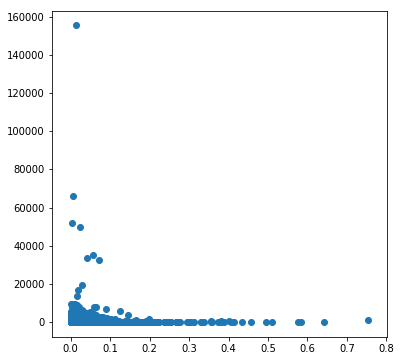

In [1067]:
plt.figure(figsize=(6, 6))
plt.scatter(cluster_data['engagement_rate'],cluster_data['cost_post'])

In [1087]:
columns=['cost_post','cost_video','followers','following','followers_to_following','is_verified'
,'engagement_rate','engagement_rate_image','engagement_rate_video','likes_per_post','likesb_per_post_pct','likes_per_post_image',

'likes_per_post_video','replies_per_post','replies_per_post_pct','replies_per_post_image','replies_per_post_video'  ,
'views_per_video','views_per_video_pct','posts','posts_per_week']

## Using kmean to cluster the data

In [1088]:
df_tr_std = StandardScaler().fit_transform(cluster_data[columns])
# using 39 cluster as the catogeies that are extracted from fullname_biography
#Cluster the data
kmeans = KMeans(n_clusters=39, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
cluster_data['clusters'] = labels

#Add the column into our list
columns.extend(['clusters'])

#Lets analyze the clusters
 

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1089]:
cluster_data 

cost_post  cost_video  followers  following  followers_to_following  \
0        3240.0      5510.0      86300       2276               37.917399   
1         110.0       350.0       1393       2506                0.555866   
2         110.0       340.0       1366        161                8.484472   
3         110.0       360.0       1644        102               16.117647   
4         130.0       410.0       2381        549                4.336976   
5         420.0      1080.0      11179        170               65.758824   
6         390.0      1020.0      10386       7297                1.423325   
7         100.0       320.0       1049       1120                0.936607   
8        3220.0      5480.0      85821        172              498.959302   
9         130.0       400.0       2172        247                8.793522   
10        110.0       340.0       1366       1358                1.005891   
11        140.0       440.0       2864        131               21.862595   
12        940.0      2050.0      25085       2404               10.434692   
13        110.0       350.0       1520        624                2.435897   
14        100.0       320.0       1013        787                1.287166   
15        130.0       410.0       2328        888                2.621622   
16        100.0       330.0       1128        620                1.819355   
17        130.0       400.0       2228       1372                1.623907   
18        900.0      1970.0      23886         78              306.230769   
19        150.0       450.0       3052        482                6.331950   
20       2620.0      4640.0      69680         45             1548.444444   
21        390.0      1010.0      10261        168               61.077381   
22       4060.0      6700.0     136649       3756               36.381523   
23        130.0       410.0       2425       1619                1.497838   
24        110.0       340.0       1372        298                4.604027   
25        130.0       410.0       2309        152               15.190789   
26        100.0       320.0       1077       2817                0.382322   
27        220.0       640.0       5837        395               14.777215   
28        160.0       500.0       3860          9              428.888889   
29        110.0       340.0       1310        456                2.872807   
...         ...         ...        ...        ...                     ...   
2270      160.0       490.0       3608       1725                2.091594   
2271      520.0      1260.0      13762        125              110.096000   
2272      250.0       720.0       6815        169               40.325444   
2273      100.0       320.0       1068        395                2.703797   
2274      480.0      1200.0      12818       2777                4.615772   
2275      160.0       480.0       3483       1275                2.731765   
2276     3430.0      5760.0      91318         88             1037.704545   
2277      870.0      1910.0      23056        983               23.454730   
2278     2570.0      4570.0      68345         94              727.074468   
2279      310.0       840.0       8253        302               27.327815   
2280     5030.0      8200.0     253423       1399              181.145818   
2281     1860.0      3520.0      49337       4282               11.521952   
2282      100.0       320.0       1041       1914                0.543887   
2283      240.0       690.0       6466       1431                4.518519   
2284      130.0       410.0       2415        397                6.083123   
2285      270.0       750.0       7266       4636                1.567299   
2286      520.0      1270.0      13791        326               42.303681   
2287      120.0       390.0       2107        640                3.292187   
2288     1430.0      2860.0      37959        192              197.703125   
2289      250.0       700.0       6668       2133                3.126113   
22

In [1090]:
centroids = kmeans.cluster_centers_

In [1094]:
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(df_tr_std))
 
silhouette_score = metrics.silhouette_score(df_tr_std, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[23 30  1 ... 30 13  1]
Centroids data
[[-7.70615358e-02 -9.46620616e-02 -7.38097911e-02 -2.39000461e-01
  -4.92882770e-02 -1.00503782e-01  4.80742056e-01  2.75298293e-01
   1.43182762e+00  7.52302195e-02  5.55173031e-01  4.94585300e-02
   1.32188346e-01 -2.93315083e-02  1.05258966e-01 -3.01559126e-02
   3.24055843e-02  3.35682342e-01  4.25680733e+00 -3.67440842e-01
  -5.29265444e-02]
 [-9.16355408e-02 -1.06773425e-01 -7.95258482e-02 -3.72049570e-01
  -5.39774123e-02 -1.00503782e-01 -5.41221194e-01 -5.43514072e-01
  -3.05154748e-01 -1.17163009e-01 -5.80358387e-01 -1.20491903e-01
  -6.77425410e-02 -7.98946690e-02 -2.36403588e-01 -7.61164545e-02
  -6.55239415e-02 -5.82257352e-02 -1.53913549e-01 -1.69451492e-01
  -4.24689176e-02]
 [ 3.69305939e+01  3.17617321e+01  4.17224126e+01 -4.65595217e-01
   5.51477446e+00  9.94987437e+00 -5.36666715e-01 -5.57738307e-01
  -1.12814840e-02  3.28613617e+01 -5.59856626e-01  3.10058548e+01
   4.11416798e+01  7.62495264

Silhouette_score: 
0.25424644574203514


- Silhouette_score :Values is not so close to 1, and its kind of far from 0 indicate that the sample is somehow far away from the neighboring clusters. 

### Feauter work: I will do more mork on clustering results  to build a new combination of catogeries  in my reccomendation system

# Now this is my finall system using knn distance 

- I try to use a collaborative recommendation system methodologies I found a struggle in creating the matrix for all my numerical values that describe the influencer.
    also, each influencer can belong to more than one category.
Moreover, the most recommendation system and also the one that we studied in class, columns, and rows are the same category while my goal was to make categories that influencer belongs to and influencers. Here I just keep the first category and delete others then I use a pivot table using the categories, username, and engagement rate values to fit k NearestNeighbors model.  After that, I will use the model.kneighbors to find the best influencer using distances.flatten().

In [1119]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].map(lambda x:x.replace('\'','').replace(',', ''))

In [1130]:
saudi_influencer_v1['final_combined_name_biography']=saudi_influencer_v1['final_combined_name_biography'].map(lambda x:x.split(' ')[0])

In [1158]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_infleuncer_features = saudi_influencer_v1.pivot(
    index='username',
    columns='final_combined_name_biography',
    values='engagement_rate'
).fillna(0)
# convert dataframe of movie features to scipy sparse matrix
mat_infleuncer_features = csr_matrix(df_infleuncer_features.values)

In [1159]:
df_infleuncer_features

final_combined_name_biography  actor       art    beauti   blogger      book  \
username                                                                       
0.a0l                            0.0  0.000000  0.038466  0.000000  0.000000   
00_ghaida                        0.0  0.134656  0.000000  0.000000  0.000000   
0_ma5                            0.0  0.000000  0.000000  0.000000  0.000000   
0rw11                            0.0  0.000000  0.000000  0.000000  0.023963   
0vii.6                           0.0  0.000000  0.000000  0.000000  0.000000   
1.isabella                       0.0  0.000000  0.000000  0.000000  0.000000   
140.40.00                        0.0  0.000000  0.000000  0.000000  0.000000   
17___mis                         0.0  0.000000  0.000000  0.000000  0.000000   
19.ei                            0.0  0.004286  0.000000  0.000000  0.000000   
1993norah                        0.0  0.000000  0.000000  0.005025  0.000000   
1995_azooz                       0.0  0.151392  0.000000  0.000000  0.000000   
19noon                           0.0  0.000000  0.000000  0.000000  0.000000   
1_fashioncode                    0.0  0.000000  0.000000  0.000000  0.000000   
1ghala1                          0.0  0.000000  0.000000  0.000000  0.000000   
1mhah                            0.0  0.000000  0.000000  0.000000  0.000000   
1newa                            0.0  0.024127  0.000000  0.000000  0.000000   
1umw                             0.0  0.000000  0.000000  0.000000  0.000000   
1xbx                             0.0  0.000000  0.009099  0.000000  0.000000   
26_ar_art                        0.0  0.051909  0.000000  0.000000  0.000000   
26_g                             0.0  0.000000  0.000000  0.006216  0.000000   
2hamiii                          0.0  0.061838  0.000000  0.000000  0.000000   
2mavensisters                    0.0  0.000000  0.000000  0.000000  0.000000   
2rw.r                            0.0  0.000000  0.000000  0.000000  0.000000   
3.6.doom                         0.0  0.000000  0.000000  0.000000  0.000000   
3_iz                             0.0  0.000000  0.000000  0.000000  0.000000   
3bdalbas6                        0.0  0.000000  0.000000  0.000000  0.000000   
3lo.29                           0.0  0.000000  0.000000  0.000000  0.000000   
3m_77                            0.0  0.000000  0.000000  0.000000  0.000000   
3un_photo                        0.0  0.000000  0.086181  0.000000  0.000000   
3wmrz                            0.0  0.000000  0.000000  0.000000  0.000000   
...                              ...       ...       ...       ...       ...   
za94x                            0.0  0.000000  0.000000  0.000000  0.000000   
zahr_4z                          0.0  0.000000  0.000000  0.000000  0.000000   
zahraazied                       0.0  0.013753  0.000000  0.000000  0.000000   
zaidovic                         0.0  0.000000  0.000000  0.000000  0.000000   
zain_model                       0.0  0.000000  0.000000  0.000000  0.000000   
zainab27.artist                  0.0  0.034654  0.000000  0.000000  0.000000   
zainab_art24                     0.0  0.047794  0.000000  0.000000  0.000000   
zainab_makeup14                  0.0  0.050269  0.000000  0.000000  0.000000   
zainabaalj                       0.0  0.083605  0.000000  0.000000  0.000000   
zaman_jassim                     0.0  0.019462  0.000000  0.000000  0.000000   
zaynabchapti                     0.0  0.000000  0.000000  0.000000  0.000000   
zeezo1997                        0.0  0.000000  0.000000  0.000000  0.000000   
zekofit                          0.0  0.000000  0.000000  0.000000  0.000000   
zenadiaries                      0.0  0.000000  0.000000  0.000000  0.000000   
zfa_                             0.0  0.000000  0.000000  0.000000  0.000000   
zfphotos                         0.0  0.000000  0.000000  0.000000  0.000000   
zinaboussama01                   0.0  0.000000  0.000000  0.000000  0.000000   


In [1160]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)

In [1161]:
model_knn.fit(df_infleuncer_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=5, p=2, radius=1.0)

In [1162]:
df_infleuncer_features.shape[0]

2300

In [1211]:
query_index= np.random.choice(df_infleuncer_features.shape[0])

In [1212]:
query_index

1620

In [1213]:
distances, indices= model_knn.kneighbors(df_infleuncer_features.iloc[query_index, :].values.reshape(1, -1),n_neighbors=6)

In [1214]:
best_influencer=[]

In [1215]:
for i in range(0,len(distances.flatten())):
    if i ==0:
         best_influencer.append(df_infleuncer_features.index[indices.flatten()[i]])
    else:
         best_influencer.append(df_infleuncer_features.index[indices.flatten()[i]])

In [1218]:
for i in range(0,len(best_influencer)):
    
    if i ==0:
        
        print('Recommendation for',saudi_influencer_v1[['username','engagement_rate']][saudi_influencer_v1['username']==best_influencer[i]])
    else:
        print(i,saudi_influencer_v1[['username','engagement_rate']][saudi_influencer_v1['username']== best_influencer[i]])

                                                                                          

    

Recommendation for      username  engagement_rate
1336  mesh.be         0.008515
1   username  engagement_rate
9   hooomh         0.032574
2            username  engagement_rate
1890  malakaldawood         0.032254
3       username  engagement_rate
869  _aseel305         0.046474
4     username  engagement_rate
712  salha_u         0.017216
5     username  engagement_rate
470  nada.i1          0.03732


# Conclusion:

- It was not normal to project for me, I've selected the idea and find the best data available online to work on it. Fetch data by requesting the API was a challenge first for me also the knowing the properties of data and how it is calculated and the domain knowledge of the data was another hole journey. Cleaning numerical data first and how to remove rows without affecting data. 
- Moreover,  staring another cleaning part for finding new classification categories for influencer because there was a lack of categories that have been done using the full name and biography that are in a mixed language where there is a need to unify language by translating them using another library and API.
- Finally, applying clustering (which the result of it didn't use yet because I run of time (:). Also, using the pivot table with one numerical value engagement rate to fit the knn model and use distance to find another influencer in the same categories with a high engagement rate was my last step that needs to be improved.

# Future work:

- With the use of these data, I will continue doing clustering and see the relation between the more than a category that influencer has. Also, build a recommendation system with the use of all numerical values(build specific matrix). 
- Also, I will back to my original idea where the input is categories output is the best influencers in that category.
- Also, I might use the Instagram API to get posts information for all influencers to know more things about these influences and do prediction and so on.